# **Final project**

### Wen Scraping

In [ ]:
import re
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import NoSuchElementException
from webdriver_manager.chrome import ChromeDriverManager
import time
import csv

# Настройки браузера
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument("--user-agent=Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.102 YaBrowser/20.9.3.136 Yowser/2.5 Safari/537.36")
chrome_options.add_argument("--headless")  
chrome_options.add_argument("--disable-gpu")
chrome_options.add_argument("--no-sandbox")
chrome_options.add_argument("--disable-dev-shm-usage")  # Prevent memory issues
chrome_options.add_argument("--disable-extensions")  # Disable extensions
chrome_options.add_argument("--disable-blink-features=AutomationControlled")  # Bypass bot detectio


# Запуск браузера
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service, options=chrome_options)


# Переход на сайт
url = "https://krisha.kz/prodazha/kvartiry/shymkent/?page=40"
driver.get(url)
time.sleep(5)
driver.find_element(By.XPATH,"//button[@class='tutorial__close notes-tutorial__close']").click()

header = ['Краткая информация','Тип дома', 'Город','Жилой Комплекс','Год Постройки', 'Состояние кваритиры','Площадь м2','Болкон', 'Безопасность','Порковка', 
          'Потолки','Интернет','Обмен', 'Санузел', 'Тип пола','Тип Двери', 'Описание', 'Этаж','Контактный Номер', 'Автор обьявления','Ипотека','Рассрочка','Акций'
          ,'phone','Бывшее общежитие','Новостройка', 'Цена']

pages = 0

with open('krisha_parsing_Astana_5.csv', mode='a',newline='',encoding='utf-8') as krisha_parsing_csv:
    writer_1 = csv.writer(krisha_parsing_csv)
    if krisha_parsing_csv.tell() == 0:
        writer_1.writerow(header)

    
    while True:
        product_elements = driver.find_elements(By.CSS_SELECTOR, "div.a-card__inc")
        iter = 0
        start_time_3 = time.time()
        for i,iteration in enumerate(product_elements):
            pages += 1 

            iter += 1
            product_elements = driver.find_elements(By.CSS_SELECTOR, "div.a-card__inc")

            product_url = product_elements[i].find_element(By.TAG_NAME, "a").get_attribute("href")
            driver.execute_script("window.open(arguments[0], '_blank');", product_url)
            driver.switch_to.window(driver.window_handles[1])  # Переключаемся на новую вкладку
            time.sleep(3)
          
        # --------------------------------
            # Краткая информация ✅
            try:
                short_title = driver.find_element(By.XPATH,"//div[@class='offer__advert-title']/h1").text # Краткая информация
            except NoSuchElementException:
                short_title = 'N/A'

        # --------------------------------
            # Тип дома ✅
            try:
                house_type = driver.find_element(By.XPATH,"//div[@class='offer__info-title' and text()='Тип дома']//following-sibling::div[@class='offer__advert-short-info']").text
            except NoSuchElementException:
                house_type = 'N/A'

        # --------------------------------    
            # Город ✅
            try:
                city = driver.find_element(By.XPATH,"//div[@class='offer__location offer__advert-short-info']/span").text # 
            except NoSuchElementException:
                city = 'Астана'

         # --------------------------------
            # Жилой Комплекс  ✅
            try:
                l_complecs = driver.find_element(By.XPATH, "//div[@class='offer__info-title' and text()='Жилой комплекс']//following-sibling::div[@class='offer__advert-short-info']/a").text 
            except NoSuchElementException :
                try:
                    l_complecs = driver.find_element(By.XPATH, "//dt[@data-name='flat.complex']/following-sibling::dd").text 
                except NoSuchElementException:
                    l_complecs = 'N/A'

        # --------------------------------
            # Год Постройки ✅
            try:
                builded_year = driver.find_element(By.XPATH, "//div[@class='offer__info-title' and text()='Год постройки']//following-sibling::div[@class='offer__advert-short-info']").text
            except NoSuchElementException :
                try:
                    builded_year = driver.find_element(By.XPATH,"//dt[@data-name='flat.build_year']/following-sibling::dd").text 
                except NoSuchElementException:
                    builded_year = 'N/A'
        # --------------------------------
            # Состояние кваритиры ✅
            try :
                quality_of_house = driver.find_element(By.XPATH,"//div[@class='offer__info-title' and text()='Состояние']//following-sibling::div[@class='offer__advert-short-info']").text
            except NoSuchElementException:
                try:
                    quality_of_house = driver.find_element(By.XPATH,"//dt[@data-name='flat.quality']/following-sibling::dd").text 
                except NoSuchElementException:
                    quality_of_house = 'N/A'

        # --------------------------------
            # Площадь м2 ✅
            try:
                area = driver.find_element(By.XPATH, "//div[@class='offer__info-title' and text()='Площадь, м²']//following-sibling::div[@class='offer__advert-short-info']").text 
            except NoSuchElementException:
                try:
                    area = driver.find_element(By.XPATH,"//dt[@data-name='flat.area']/following-sibling::dd")
                except NoSuchElementException:
                    area = 'N/A'

        # --------------------------------
            # Болкон ✅
            try:
                bolkon = driver.find_element(By.XPATH, "//dt[@data-name='flat.balcony']/following-sibling::dd").text 
            except NoSuchElementException:
                try:
                    bolkon = driver.find_element(By.XPATH, "//div[text()='Болкон']/following-sibling::div[@class='offer__advert-short-info']").text 
                except NoSuchElementException:
                    bolkon = 'N/A'

        # --------------------------------    
            # Безопасность ✅
            try :
                security_system = driver.find_element(By.XPATH,"//dt[@data-name='flat.security']/following-sibling::dd").text 
            except NoSuchElementException:
                try:
                    security_system = driver.find_element(By.XPATH,"//div[text()='Безопасность']/following-sibling::div[@class='offer__advert-short-info']").text 
                except NoSuchElementException:
                    security_system = 'N/A'

        # --------------------------------
            # Порковка ✅
            try:
                parking = driver.find_element(By.XPATH,"//dt[@data-name='flat.parking']/following-sibling::dd").text 
            except NoSuchElementException:
                try:
                    parking = driver.find_element(By.XPATH,"//div[text()='Порковка']/following-sibling::div[@class='offer__advert-short-info']").text 
                except NoSuchElementException:
                    parking = 'N/A'

        # --------------------------------
            # Потолки ✅
            try:
                ceilings = driver.find_element(By.XPATH,"//dt[@data-name='ceiling']/following-sibling::dd").text 
            except NoSuchElementException:
               try:
                    ceilings = driver.find_element(By.XPATH,"//div[text()='Потолки']/following-sibling::div[@class='offer__advert-short-info']").text 
               except NoSuchElementException:
                    ceilings = 'N/A'

        # --------------------------------
            # Интернет ✅
            try:
                inet_type = driver.find_element(By.XPATH,"//dt[@data-name='inet.type']/following-sibling::dd").text 
            except NoSuchElementException:
                try:
                    inet_type = driver.find_element(By.XPATH,"//div[text()='Интернет']/following-sibling::div[@class='offer__advert-short-info']").text
                except NoSuchElementException:
                    inet_type ='N/A'

        # --------------------------------
            # Обмен ✅
            try: 
                trading = driver.find_element(By.XPATH,"//dt[@data-name='has_change']/following-sibling::dd").text 
            except NoSuchElementException:
               try:
                    trading = driver.find_element(By.XPATH,"//div[text()='Обмен']/following-sibling::div[@class='offer__advert-short-info']").text 
               except NoSuchElementException:
                    trading = 'N/A'

        # --------------------------------
            # Санузел ✅
            try:
                bathrooms = driver.find_element(By.XPATH,"//dt[@data-name='flat.toilet']/following-sibling::dd").text 
            except NoSuchElementException:
                try:
                    bathrooms = driver.find_element(By.XPATH,"//div[text()='Санузел']/following-sibling::div[@class='offer__advert-short-info']").text 
                except NoSuchElementException:
                    bathrooms = 'N/A'
        
        # --------------------------------
            # Тип пола ✅
            try:
                flooring_type = driver.find_element(By.XPATH,"//dt[@data-name='flat.flooring']/following-sibling::dd").text
            except NoSuchElementException:
                try:
                  flooring_type = driver.find_element(By.XPATH,"//div[text()='Пол']/following-sibling::div[@class='offer__advert-short-info']").text 
                except NoSuchElementException:
                   flooring_type = 'N/A'
        
        # --------------------------------
            # Тип Двери
            try:
               door_type = driver.find_element(By.XPATH, "//dt[@data-name='flat.door']/following-sibling::dd").text 
            except NoSuchElementException:
                try:
                  door_type = driver.find_element(By.XPATH,"//div[text()='Дверь']/following-sibling::div[@class='offer__advert-short-info']").text 
                except NoSuchElementException:
                   door_type = 'N/A'

        # --------------------------------
            # Описание ✅
            try:
                descriptions = driver.find_element(By.XPATH,"//div[@class='js-description a-text a-text-white-spaces']").text 
            except NoSuchElementException:
                descriptions = 'N/A'

        # --------------------------------
            # Этаж ✅
            try:
                floor_number = driver.find_element(By.XPATH,"//div[text()='Этаж']//following-sibling::div[@class='offer__advert-short-info']").text 
            except NoSuchElementException:
                try:
                    floor_number =  driver.find_element(By.XPATH,"//div[text()='Этаж']/following-sibling::div[@class='offer__advert-short-info']").text 
                except NoSuchElementException:
                    floor_number = 'N/A'
                    
        
        # --------------------------------
            # Контактный Номер ✅
            time.sleep(2.5)
            try:
                driver.find_element(By.XPATH, "//button[@class='show-phones']").click()
                time.sleep(2)
            except NoSuchElementException:
                pass 
            try:
                driver.find_element(By.XPATH,"//div[@class='recaptcha-checkbox-border']").click()
            except NoSuchElementException:
                try:
                    time.sleep(3)
                    contact_phone = driver.find_element(By.XPATH,"//div[@class='offer__contacts-phones']/p").text 
                except NoSuchElementException:
                    contact_phone = 'N/A'
        
        # ---------------------------------
            # Автор обьявления 
            try:
                author = driver.find_element(By.XPATH,"//div[@class='owners__name']").text 
            except NoSuchElementException:
                author = 'N/A'

        # --------------------------------
            # Ипотека ✅
            try:
                ipoteka = driver.find_element(By.XPATH,"//span[@class='credit-badge credit-badge--hypothec']").text 
            except NoSuchElementException:
                ipoteka = 'N/A'
        
        # --------------------------------
            # Рассрочка ✅
            try:
                rassroska = driver.find_element(By.XPATH,"//span[@class='credit-badge credit-badge--installment']").text 
            except NoSuchElementException:
                rassroska = 'N/A'
            
        # --------------------------------
            # Акций ✅
            try:
                promotions = driver.find_element(By.XPATH,"//span[@class='credit-badge credit-badge--promotion']").text 
            except NoSuchElementException:
                promotions = 'N/A'
        
        # --------------------------------
            # phone ✅
            try:
                phone = driver.find_element(By.XPATH,"//dt[@data-name='flat.phone']/following-sibling::dd").text 
            except NoSuchElementException:
                try:
                    phone = driver.find_element(By.XPATH,"//div[text()='Телефон']//following-sibling::div[@class='offer__advert-short-info']").text 
                except NoSuchElementException:
                    phone = 'N/A'
        
        # --------------------------------
            # Бывшее общежитие ✅
            try:
                former_dorm = driver.find_element(By.XPATH,"//dt[@data-name='flat.priv_dorm']/following-sibling::dd").text 
            except NoSuchElementException:
                try:
                    former_dorm = driver.find_element(By.XPATH,"//div[text()='Бывшее общежитие']//following-sibling::div[@class='offer__advert-short-info']").text 
                except NoSuchElementException:
                    former_dorm = 'N/A'
        # --------------------------------
            # Новостройка ✅
            try:
                novostroyka = driver.find_element(By.XPATH,"//div[@class='label label--green label-user-complex']").text 
            except NoSuchElementException:
                novostroyka = 'N/A'
            
        # Цена ✅
            try:
                price  = driver.find_element(By.XPATH,"//div[@class='offer__price']").text 
            except NoSuchElementException:
                price  = 'N/A'
        

            # Запись всех собранных данных в строку
            row = [
                    short_title, house_type, city, l_complecs, builded_year, quality_of_house, area, bolkon, security_system, parking, 
                    ceilings, inet_type, trading, bathrooms, flooring_type, door_type, descriptions, floor_number, contact_phone, 
                     author, ipoteka, rassroska, promotions, phone, former_dorm, novostroyka,price
            ]

            writer_1.writerow(row)

            # Закрывает вкладку 
            driver.close()
            driver.switch_to.window(driver.window_handles[0])
            time.sleep(2)

            if iter == len(product_elements):
                try:
                    driver.find_element(By.XPATH,"//a[@class='paginator__btn paginator__btn--next']").click()
                except NoSuchElementException:
                    driver.quit()
            time.sleep(2)
        end_time_3 = time.time()
        print(f"For {pages} items it takes about {(end_time_3 - start_time_3)/60:.2f} minutes ")
        if pages >= 1000:
            driver.quit()

In [14]:
import pandas as pd

df1 = pd.read_csv('krisha_parsing_Shymkent_3.csv')
df1

,Краткая информация,Тип дома,Город,Жилой Комплекс,Год Постройки,Состояние кваритиры,Площадь м2,Болкон,Безопасность,Порковка,...,Этаж,Контактный Номер,Автор обьявления,Ипотека,Рассрочка,Акций,phone,Бывшее общежитие,Новостройка,Цена
0,"3-комнатная квартира · 100.78 м², К. Толеметова",монолитный,Шымкент,Dendropark,2025,NaN,100.78 м²,NaN,NaN,NaN,...,NaN,+7 775 020 4438,Застройщик BI Group,NaN,NaN,NaN,NaN,NaN,Новостройка,NaN
1,"3-комнатная квартира · 112.83 м², Толеметова",монолитный,Шымкент,Hyde Park Shymkent,2025,NaN,112.83 м²,NaN,NaN,NaN,...,NaN,+7 778 021 1885,Застройщик BI Group,Ипотека,NaN,Акции,NaN,NaN,Новостройка,NaN
2,"2-комнатная квартира · 55.44 м², Толеметова 106/3",монолитный,Шымкент,Otbasy,2024,NaN,55.44 м²,NaN,NaN,NaN,...,NaN,+7 778 021 1815,Застройщик ТОО Kanfar Building,Ипотека,Рассрочка,NaN,NaN,NaN,Новостройка,NaN
3,"2-комнатная квартира · 52.93 м², Микрорайон Ас...",монолитный,"Шымкент, Абайский р-н",BAQSARAY,2024,NaN,52.93 м²,NaN,NaN,NaN,...,NaN,+7 778 017 1135,Застройщик BKN GROUP,Ипотека,Рассрочка,NaN,NaN,NaN,Новостройка,NaN
4,"3-комнатная квартира · 98 м² · 8/8 этаж, торек...",монолитный,"Шымкент, Аль-Фарабийский р-н",NaN,2023,черновая отделка,98 м²,несколько балконов или лоджий,"охрана, домофон, кодовый замок, сигнализация, ...",NaN,...,8 из 8,+7 706 428 2102,Құлтан Бибарыс,NaN,NaN,NaN,NaN,нет,NaN,41 500 000 \n〒
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
781,"4-комнатная квартира · 74 м² · 3/5 этаж, Спорт...",NaN,Шымкент,NaN,1987,NaN,74 м²,NaN,домофон,NaN,...,3 из 5,NaN,Ажибекова Айжан,NaN,NaN,NaN,NaN,нет,NaN,27 000 000 \n〒
782,"3-комнатная квартира · 96.2 м² · 4/5 этаж, Нур...",иной,"Шымкент, Туран р-н",NaN,2012,NaN,"96.2 м², Площадь кухни — 12.5 м²",NaN,"решетки на окнах, домофон, видеонаблюдение",паркинг,...,4 из 5,NaN,NaN,NaN,NaN,NaN,NaN,нет,NaN,46 000 000 \n〒
783,"2-комнатная квартира · 70 м² · 9/12 этаж, мкр ...",монолитный,"Шымкент, Каратауский р-н",NAURYZ PARK,2022,NaN,70 м²,NaN,NaN,NaN,...,9 из 12,NaN,Динара Туленова,NaN,NaN,NaN,NaN,NaN,NaN,38 000 000 \n〒
784,"4-комнатная квартира · 74 м² · 3/5 этаж, Спорт...",NaN,Шымкент,NaN,1987,NaN,74 м²,NaN,домофон,NaN,...,3 из 5,NaN,Ажибекова Айжан,NaN,NaN,NaN,NaN,нет,NaN,27 000 000 \n〒


In [15]:
df2 = pd.read_csv('krisha_parsing_Shymkent_5.csv')
df2

,Краткая информация,Тип дома,Город,Жилой Комплекс,Год Постройки,Состояние кваритиры,Площадь м2,Болкон,Безопасность,Порковка,...,Этаж,Контактный Номер,Автор обьявления,Ипотека,Рассрочка,Акций,phone,Бывшее общежитие,Новостройка,Цена
0,"2-комнатная квартира · 51.7 м² · 2/2 этаж, 4 м...",кирпичный,"Шымкент, Туран р-н",NaN,1994,"не новый, но аккуратный ремонт","51.7 м², Площадь кухни — 6.8 м²",лоджия,решетки на окнах,NaN,...,2 из 2,+7 747 261 1581,NaN,NaN,NaN,NaN,NaN,нет,NaN,20 500 000 \n〒
1,"4-комнатная квартира · 78.3 м² · 1/5 этаж, 11-...",NaN,"Шымкент, Енбекшинский р-н",NaN,1975,свежий ремонт,"78.3 м², Площадь кухни — 8.4 м²",NaN,NaN,NaN,...,1 из 5,+7 701 622 2826,NaN,NaN,NaN,NaN,NaN,нет,NaN,30 000 000 \n〒
2,"1-комнатная квартира · 42 м² · 3/5 этаж, 8-й м...",панельный,"Шымкент, Абайский р-н",NaN,1990,"не новый, но аккуратный ремонт",42 м²,лоджия,"домофон, кодовый замок",рядом охраняемая стоянка,...,3 из 5,+7 705 683 7734,NaN,NaN,NaN,NaN,есть возможность подключения,нет,NaN,14 500 000 \n〒
3,"3-комнатная квартира · 70 м² · 3/5 этаж, 16-й ...",панельный,"Шымкент, Енбекшинский р-н",NaN,1974,свежий ремонт,"70 м², Площадь кухни — 12 м²",несколько балконов или лоджий,домофон,NaN,...,3 из 5,+7 707 777 9933,NaN,NaN,NaN,NaN,есть возможность подключения,нет,NaN,32 000 000 \n〒
4,"1-комнатная квартира · 40 м² · 4/9 этаж, Октяб...",монолитный,"Шымкент, Туран р-н",Туран,2024,черновая отделка,40 м²,балкон,"охрана, домофон, кодовый замок, видеонаблюдение",паркинг,...,4 из 9,NaN,NaN,NaN,NaN,NaN,отдельный,нет,NaN,19 000 000 \n〒
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,"2-комнатная квартира · 54 м² · 9/25 этаж, Байд...",монолитный,"Шымкент, Абайский р-н",Capital City,2024,NaN,54 м²,NaN,NaN,NaN,...,9 из 25,NaN,NaN,NaN,NaN,NaN,NaN,нет,NaN,40 000 000 \n〒
226,"3-комнатная квартира · 59 м² · 3/5 этаж, Манге...",панельный,"Шымкент, Туран р-н",NaN,1966,свежий ремонт,59 м²,NaN,NaN,NaN,...,3 из 5,NaN,NaN,NaN,NaN,NaN,NaN,нет,NaN,30 000 000 \n〒
227,"3-комнатная квартира · 62 м² · 4/5 этаж, 16-й ...",панельный,"Шымкент, Енбекшинский р-н",NaN,1975,"не новый, но аккуратный ремонт",62 м²,балкон и лоджия,решетки на окнах,NaN,...,4 из 5,NaN,Оспанова Жанна,NaN,NaN,NaN,отдельный,нет,NaN,25 500 000 \n〒
228,"3-комнатная квартира · 62 м² · 5/5 этаж, Дулати 8",кирпичный,"Шымкент, Аль-Фарабийский р-н",NaN,1975,"не новый, но аккуратный ремонт",62 м²,балкон и лоджия,домофон,NaN,...,5 из 5,NaN,NaN,NaN,NaN,NaN,есть возможность подключения,нет,NaN,23 000 000 \n〒


In [20]:
df_Shymkent = pd.concat([df1, df2], axis=0)
df_Shymkent

,Краткая информация,Тип дома,Город,Жилой Комплекс,Год Постройки,Состояние кваритиры,Площадь м2,Болкон,Безопасность,Порковка,...,Этаж,Контактный Номер,Автор обьявления,Ипотека,Рассрочка,Акций,phone,Бывшее общежитие,Новостройка,Цена
0,"3-комнатная квартира · 100.78 м², К. Толеметова",монолитный,Шымкент,Dendropark,2025,NaN,100.78 м²,NaN,NaN,NaN,...,NaN,+7 775 020 4438,Застройщик BI Group,NaN,NaN,NaN,NaN,NaN,Новостройка,NaN
1,"3-комнатная квартира · 112.83 м², Толеметова",монолитный,Шымкент,Hyde Park Shymkent,2025,NaN,112.83 м²,NaN,NaN,NaN,...,NaN,+7 778 021 1885,Застройщик BI Group,Ипотека,NaN,Акции,NaN,NaN,Новостройка,NaN
2,"2-комнатная квартира · 55.44 м², Толеметова 106/3",монолитный,Шымкент,Otbasy,2024,NaN,55.44 м²,NaN,NaN,NaN,...,NaN,+7 778 021 1815,Застройщик ТОО Kanfar Building,Ипотека,Рассрочка,NaN,NaN,NaN,Новостройка,NaN
3,"2-комнатная квартира · 52.93 м², Микрорайон Ас...",монолитный,"Шымкент, Абайский р-н",BAQSARAY,2024,NaN,52.93 м²,NaN,NaN,NaN,...,NaN,+7 778 017 1135,Застройщик BKN GROUP,Ипотека,Рассрочка,NaN,NaN,NaN,Новостройка,NaN
4,"3-комнатная квартира · 98 м² · 8/8 этаж, торек...",монолитный,"Шымкент, Аль-Фарабийский р-н",NaN,2023,черновая отделка,98 м²,несколько балконов или лоджий,"охрана, домофон, кодовый замок, сигнализация, ...",NaN,...,8 из 8,+7 706 428 2102,Құлтан Бибарыс,NaN,NaN,NaN,NaN,нет,NaN,41 500 000 \n〒
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,"2-комнатная квартира · 54 м² · 9/25 этаж, Байд...",монолитный,"Шымкент, Абайский р-н",Capital City,2024,NaN,54 м²,NaN,NaN,NaN,...,9 из 25,NaN,NaN,NaN,NaN,NaN,NaN,нет,NaN,40 000 000 \n〒
226,"3-комнатная квартира · 59 м² · 3/5 этаж, Манге...",панельный,"Шымкент, Туран р-н",NaN,1966,свежий ремонт,59 м²,NaN,NaN,NaN,...,3 из 5,NaN,NaN,NaN,NaN,NaN,NaN,нет,NaN,30 000 000 \n〒
227,"3-комнатная квартира · 62 м² · 4/5 этаж, 16-й ...",панельный,"Шымкент, Енбекшинский р-н",NaN,1975,"не новый, но аккуратный ремонт",62 м²,балкон и лоджия,решетки на окнах,NaN,...,4 из 5,NaN,Оспанова Жанна,NaN,NaN,NaN,отдельный,нет,NaN,25 500 000 \n〒
228,"3-комнатная квартира · 62 м² · 5/5 этаж, Дулати 8",кирпичный,"Шымкент, Аль-Фарабийский р-н",NaN,1975,"не новый, но аккуратный ремонт",62 м²,балкон и лоджия,домофон,NaN,...,5 из 5,NaN,NaN,NaN,NaN,NaN,есть возможность подключения,нет,NaN,23 000 000 \n〒


In [44]:
df_Shymkent.to_csv('Shymkent.csv')

In [21]:
df_Shymkent.duplicated().sum()

191

In [2]:

import pandas as pd
df_Shymkent = pd.read_csv('Shymkent.csv')

In [5]:
df_Shymkent

,Unnamed: 0,Краткая информация,Тип дома,Город,Жилой Комплекс,Год Постройки,Состояние кваритиры,Площадь м2,Болкон,Безопасность,...,Этаж,Контактный Номер,Автор обьявления,Ипотека,Рассрочка,Акций,phone,Бывшее общежитие,Новостройка,Цена
0,0,"3-комнатная квартира · 100.78 м², К. Толеметова",монолитный,Шымкент,Dendropark,2025,NaN,100.78 м²,NaN,NaN,...,NaN,+7 775 020 4438,Застройщик BI Group,NaN,NaN,NaN,NaN,NaN,Новостройка,NaN
1,1,"3-комнатная квартира · 112.83 м², Толеметова",монолитный,Шымкент,Hyde Park Shymkent,2025,NaN,112.83 м²,NaN,NaN,...,NaN,+7 778 021 1885,Застройщик BI Group,Ипотека,NaN,Акции,NaN,NaN,Новостройка,NaN
2,2,"2-комнатная квартира · 55.44 м², Толеметова 106/3",монолитный,Шымкент,Otbasy,2024,NaN,55.44 м²,NaN,NaN,...,NaN,+7 778 021 1815,Застройщик ТОО Kanfar Building,Ипотека,Рассрочка,NaN,NaN,NaN,Новостройка,NaN
3,3,"2-комнатная квартира · 52.93 м², Микрорайон Ас...",монолитный,"Шымкент, Абайский р-н",BAQSARAY,2024,NaN,52.93 м²,NaN,NaN,...,NaN,+7 778 017 1135,Застройщик BKN GROUP,Ипотека,Рассрочка,NaN,NaN,NaN,Новостройка,NaN
4,4,"3-комнатная квартира · 98 м² · 8/8 этаж, торек...",монолитный,"Шымкент, Аль-Фарабийский р-н",NaN,2023,черновая отделка,98 м²,несколько балконов или лоджий,"охрана, домофон, кодовый замок, сигнализация, ...",...,8 из 8,+7 706 428 2102,Құлтан Бибарыс,NaN,NaN,NaN,NaN,нет,NaN,41 500 000 \n〒
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1011,225,"2-комнатная квартира · 54 м² · 9/25 этаж, Байд...",монолитный,"Шымкент, Абайский р-н",Capital City,2024,NaN,54 м²,NaN,NaN,...,9 из 25,NaN,NaN,NaN,NaN,NaN,NaN,нет,NaN,40 000 000 \n〒
1012,226,"3-комнатная квартира · 59 м² · 3/5 этаж, Манге...",панельный,"Шымкент, Туран р-н",NaN,1966,свежий ремонт,59 м²,NaN,NaN,...,3 из 5,NaN,NaN,NaN,NaN,NaN,NaN,нет,NaN,30 000 000 \n〒
1013,227,"3-комнатная квартира · 62 м² · 4/5 этаж, 16-й ...",панельный,"Шымкент, Енбекшинский р-н",NaN,1975,"не новый, но аккуратный ремонт",62 м²,балкон и лоджия,решетки на окнах,...,4 из 5,NaN,Оспанова Жанна,NaN,NaN,NaN,отдельный,нет,NaN,25 500 000 \n〒
1014,228,"3-комнатная квартира · 62 м² · 5/5 этаж, Дулати 8",кирпичный,"Шымкент, Аль-Фарабийский р-н",NaN,1975,"не новый, но аккуратный ремонт",62 м²,балкон и лоджия,домофон,...,5 из 5,NaN,NaN,NaN,NaN,NaN,есть возможность подключения,нет,NaN,23 000 000 \n〒


In [28]:
df_Astana = pd.read_csv('Krisha_Astana_2.csv')
df_Astana

,Краткая информация,Тип дома,Город,Жилой Комплекс,Год Постройки,Состояние кваритиры,Площадь м2,Болкон,Безопасность,Порковка,...,Этаж,Контактный Номер,Автор обьявления,Ипотека,Рассрочка,Акций,phone,Бывшее общежитие,Новостройка,Цена
0,"2-комнатная квартира · 76.3 м² · 15/18 этаж, К...",монолитный,"Астана, Алматы р-н",Сенатор,2016.0,"не новый, но аккуратный ремонт","76.3 м², Площадь кухни — 7.7 м²",лоджия,"решетки на окнах, сигнализация, домофон, видео...",паркинг,...,15 из 18,+7 778 288 2076,NaN,NaN,NaN,NaN,отдельный,NaN,NaN,30 000 000 \n〒
1,"1-комнатная квартира · 35.8 м² · 4/9 этаж, Ама...",кирпичный,"Астана, Алматы р-н",Керей,2022.0,свежий ремонт,35.8 м²,NaN,"домофон, кодовый замок, видеонаблюдение",паркинг,...,4 из 9,+7 747 502 3263,Голдобин Артём,NaN,NaN,NaN,есть возможность подключения,нет,NaN,16 600 000 \n〒
2,"3-комнатная квартира · 96 м² · 4/9 этаж, Бокей...",монолитный,"Астана, Есильский р-н",Only Sun & Moon,2022.0,свежий ремонт,96 м²,балкон,"охрана, кодовый замок, видеонаблюдение, видеод...",паркинг,...,4 из 9,+7 777 624 1921,Ахметова Айнагуль,NaN,NaN,NaN,NaN,нет,NaN,77 800 000 \n〒
3,"3-комнатная квартира · 130 м² · 4/7 этаж, Шамш...",монолитный,"Астана, Алматы р-н",Австрийский квартал,2019.0,NaN,130 м²,лоджия,"видеодомофон, консьерж, охрана, кодовый замок,...",паркинг,...,4 из 7,+7 777 778 8807,NaN,NaN,NaN,NaN,NaN,нет,NaN,155 000 000 \n〒
4,"1-комнатная квартира · 39 м² · 2/9 этаж, Косшы...",NaN,"Астана, Сарыарка р-н",NaN,2024.0,NaN,"39 м², Площадь кухни — 9.9 м²",NaN,NaN,NaN,...,2 из 9,+7 701 344 0471,NaN,NaN,NaN,NaN,NaN,нет,NaN,15 000 000 \n〒
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1024,"3-комнатная квартира · 60 м² · 6/11 этаж, Тура...",кирпичный,"Астана, Нура р-н",Grand Champion,2022.0,NaN,"60 м², Площадь кухни — 19 м²",NaN,NaN,паркинг,...,6 из 11,NaN,Изтлеуов Арман,NaN,NaN,NaN,NaN,нет,NaN,42 900 000 \n〒
1025,"3-комнатная квартира · 95 м² · 17/20 этаж, Каб...",монолитный,"Астана, Нура р-н",Galamat Towers,2020.0,NaN,"95 м², Площадь кухни — 11 м²",NaN,NaN,NaN,...,17 из 20,NaN,Мухаметов Шынгыс,NaN,NaN,NaN,NaN,нет,NaN,54 500 000 \n〒
1026,"1-комнатная квартира · 36 м² · 2/16 этаж, Иман...",монолитный,"Астана, р-н Байконур",Алмалы,2016.0,свежий ремонт,36 м²,NaN,NaN,паркинг,...,2 из 16,+7 775 037 2436,Жусупбекова Динара,NaN,NaN,NaN,NaN,нет,NaN,20 600 000 \n〒
1027,"3-комнатная квартира · 90 м² · 5/18 этаж, Хусе...",монолитный,"Астана, Есильский р-н",Angleterre,2022.0,свежий ремонт,"90 м², Площадь кухни — 12 м²",лоджия,"охрана, домофон, кодовый замок, видеонаблюдени...",паркинг,...,5 из 18,NaN,Дюсенгалиев Дастан,NaN,NaN,NaN,NaN,нет,NaN,58 000 000 \n〒


In [4]:
df_Almaty = pd.read_csv('krisha_Almaty_3.csv')
df_Almaty

,Краткая информация,Тип дома,Город,Жилой Комплекс,Год Постройки,Состояние кваритиры,Площадь м2,Болкон,Безопасность,Порковка,...,Этаж,Контактный Номер,Автор обьявления,Ипотека,Рассрочка,Акций,phone,Бывшее общежитие,Новостройка,Цена
0,"4-комнатная квартира · 200 м² · 1/5 этаж, мкр ...",монолитный,"Алматы, Бостандыкский р-н",Silver Hills,2022.0,NaN,200 м²,NaN,NaN,NaN,...,1 из 5,+7 778 046 8920,Валова Татьяна,NaN,NaN,NaN,NaN,нет,NaN,120 000 000 \n〒
1,"1-комнатная квартира · 33.4 м² · 3/9 этаж, про...",монолитный,"Алматы, Наурызбайский р-н",NaN,2021.0,свежий ремонт,"33.4 м², Площадь кухни — 9.7 м²",лоджия,"домофон, видеонаблюдение",рядом охраняемая стоянка,...,3 из 9,+7 775 020 4913,Абдраимова Гулнар,NaN,NaN,NaN,нет,нет,NaN,22 500 000 \n〒
2,"3-комнатная квартира · 72 м² · 3/3 этаж, Толе ...",кирпичный,"Алматы, Алмалинский р-н",NaN,1959.0,свежий ремонт,"72 м², Площадь кухни — 8 м²",лоджия,"домофон, видеонаблюдение",рядом охраняемая стоянка,...,3 из 3,+7 778 096 4992,krisha.kz,NaN,NaN,NaN,NaN,нет,NaN,56 000 000 \n〒
3,"3-комнатная квартира · 63 м² · 2/3 этаж, мкр Д...",кирпичный,"Алматы, Ауэзовский р-н",NaN,1983.0,требует ремонта,"63 м², Площадь кухни — 8.7 м²",балкон,NaN,NaN,...,2 из 3,+7 702 036 6505,Айнур Жанаткаликызы,NaN,NaN,NaN,NaN,нет,NaN,34 000 000 \n〒
4,"3-комнатная квартира · 85.2 м² · 10/10 этаж, К...",монолитный,"Алматы, Наурызбайский р-н",Хан Тенгри,2013.0,свежий ремонт,"85.2 м², Площадь кухни — 12 м²",несколько балконов или лоджий,"решетки на окнах, охрана, домофон",рядом охраняемая стоянка,...,10 из 10,NaN,Калекенова Даиана,NaN,NaN,NaN,есть возможность подключения,NaN,NaN,55 000 000 \n〒
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1056,"3-комнатная квартира · 80 м² · 7/8 этаж, Розыб...",кирпичный,"Алматы, Алмалинский р-н",NaN,1989.0,свежий ремонт,"80 м², Площадь кухни — 12 м²",балкон,"домофон, видеонаблюдение",паркинг,...,7 из 8,+7 775 037 2131,Калмыкова Наталья,NaN,NaN,NaN,отдельный,нет,NaN,52 000 000 \n〒
1057,"2-комнатная квартира · 77.1 м², Аскарова — Саина",монолитный,"Алматы, Ауэзовский р-н",Apple Residence,2023.0,NaN,77.1 м²,NaN,NaN,NaN,...,NaN,+7 775 037 2608,Застройщик Barys Stroy,Ипотека,Рассрочка,NaN,NaN,NaN,Новостройка,NaN
1058,"1-комнатная квартира · 50.6 м², Оспанова 83/36",монолитный,"Алматы, Медеуский р-н",Vendome,2025.0,NaN,50.6 м²,NaN,NaN,NaN,...,NaN,+7 775 037 2045,Застройщик ТОО AKSU Group LTD,NaN,Рассрочка,NaN,NaN,NaN,Новостройка,NaN
1059,"7-комнатная квартира · 212 м², Сыргабекова 1",монолитный,"Туздыбастау (Калинино), Алматинская обл.",Alatau Villas,2024.0,NaN,212 м²,NaN,NaN,NaN,...,NaN,+7 775 020 4477,Застройщик Рифлеокс,Ипотека,Рассрочка,NaN,NaN,NaN,Новостройка,NaN


In [61]:
df = pd.concat([df_Astana, df_Almaty, df_Shymkent], axis=0)
df

,Краткая информация,Тип дома,Город,Жилой Комплекс,Год Постройки,Состояние кваритиры,Площадь м2,Болкон,Безопасность,Порковка,...,Контактный Номер,Автор обьявления,Ипотека,Рассрочка,Акций,phone,Бывшее общежитие,Новостройка,Цена,Unnamed: 0
0,"2-комнатная квартира · 76.3 м² · 15/18 этаж, К...",монолитный,"Астана, Алматы р-н",Сенатор,2016.0,"не новый, но аккуратный ремонт","76.3 м², Площадь кухни — 7.7 м²",лоджия,"решетки на окнах, сигнализация, домофон, видео...",паркинг,...,+7 778 288 2076,NaN,NaN,NaN,NaN,отдельный,NaN,NaN,30 000 000 \n〒,NaN
1,"1-комнатная квартира · 35.8 м² · 4/9 этаж, Ама...",кирпичный,"Астана, Алматы р-н",Керей,2022.0,свежий ремонт,35.8 м²,NaN,"домофон, кодовый замок, видеонаблюдение",паркинг,...,+7 747 502 3263,Голдобин Артём,NaN,NaN,NaN,есть возможность подключения,нет,NaN,16 600 000 \n〒,NaN
2,"3-комнатная квартира · 96 м² · 4/9 этаж, Бокей...",монолитный,"Астана, Есильский р-н",Only Sun & Moon,2022.0,свежий ремонт,96 м²,балкон,"охрана, кодовый замок, видеонаблюдение, видеод...",паркинг,...,+7 777 624 1921,Ахметова Айнагуль,NaN,NaN,NaN,NaN,нет,NaN,77 800 000 \n〒,NaN
3,"3-комнатная квартира · 130 м² · 4/7 этаж, Шамш...",монолитный,"Астана, Алматы р-н",Австрийский квартал,2019.0,NaN,130 м²,лоджия,"видеодомофон, консьерж, охрана, кодовый замок,...",паркинг,...,+7 777 778 8807,NaN,NaN,NaN,NaN,NaN,нет,NaN,155 000 000 \n〒,NaN
4,"1-комнатная квартира · 39 м² · 2/9 этаж, Косшы...",NaN,"Астана, Сарыарка р-н",NaN,2024.0,NaN,"39 м², Площадь кухни — 9.9 м²",NaN,NaN,NaN,...,+7 701 344 0471,NaN,NaN,NaN,NaN,NaN,нет,NaN,15 000 000 \n〒,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1011,"2-комнатная квартира · 54 м² · 9/25 этаж, Байд...",монолитный,"Шымкент, Абайский р-н",Capital City,2024.0,NaN,54 м²,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,нет,NaN,40 000 000 \n〒,225.0
1012,"3-комнатная квартира · 59 м² · 3/5 этаж, Манге...",панельный,"Шымкент, Туран р-н",NaN,1966.0,свежий ремонт,59 м²,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,нет,NaN,30 000 000 \n〒,226.0
1013,"3-комнатная квартира · 62 м² · 4/5 этаж, 16-й ...",панельный,"Шымкент, Енбекшинский р-н",NaN,1975.0,"не новый, но аккуратный ремонт",62 м²,балкон и лоджия,решетки на окнах,NaN,...,NaN,Оспанова Жанна,NaN,NaN,NaN,отдельный,нет,NaN,25 500 000 \n〒,227.0
1014,"3-комнатная квартира · 62 м² · 5/5 этаж, Дулати 8",кирпичный,"Шымкент, Аль-Фарабийский р-н",NaN,1975.0,"не новый, но аккуратный ремонт",62 м²,балкон и лоджия,домофон,NaN,...,NaN,NaN,NaN,NaN,NaN,есть возможность подключения,нет,NaN,23 000 000 \n〒,228.0


In [62]:
df.to_csv('krisha.csv')

### Data preprocessing 

In [63]:
df.drop_duplicates()

,Краткая информация,Тип дома,Город,Жилой Комплекс,Год Постройки,Состояние кваритиры,Площадь м2,Болкон,Безопасность,Порковка,...,Контактный Номер,Автор обьявления,Ипотека,Рассрочка,Акций,phone,Бывшее общежитие,Новостройка,Цена,Unnamed: 0
0,"2-комнатная квартира · 76.3 м² · 15/18 этаж, К...",монолитный,"Астана, Алматы р-н",Сенатор,2016.0,"не новый, но аккуратный ремонт","76.3 м², Площадь кухни — 7.7 м²",лоджия,"решетки на окнах, сигнализация, домофон, видео...",паркинг,...,+7 778 288 2076,NaN,NaN,NaN,NaN,отдельный,NaN,NaN,30 000 000 \n〒,NaN
1,"1-комнатная квартира · 35.8 м² · 4/9 этаж, Ама...",кирпичный,"Астана, Алматы р-н",Керей,2022.0,свежий ремонт,35.8 м²,NaN,"домофон, кодовый замок, видеонаблюдение",паркинг,...,+7 747 502 3263,Голдобин Артём,NaN,NaN,NaN,есть возможность подключения,нет,NaN,16 600 000 \n〒,NaN
2,"3-комнатная квартира · 96 м² · 4/9 этаж, Бокей...",монолитный,"Астана, Есильский р-н",Only Sun & Moon,2022.0,свежий ремонт,96 м²,балкон,"охрана, кодовый замок, видеонаблюдение, видеод...",паркинг,...,+7 777 624 1921,Ахметова Айнагуль,NaN,NaN,NaN,NaN,нет,NaN,77 800 000 \n〒,NaN
3,"3-комнатная квартира · 130 м² · 4/7 этаж, Шамш...",монолитный,"Астана, Алматы р-н",Австрийский квартал,2019.0,NaN,130 м²,лоджия,"видеодомофон, консьерж, охрана, кодовый замок,...",паркинг,...,+7 777 778 8807,NaN,NaN,NaN,NaN,NaN,нет,NaN,155 000 000 \n〒,NaN
4,"1-комнатная квартира · 39 м² · 2/9 этаж, Косшы...",NaN,"Астана, Сарыарка р-н",NaN,2024.0,NaN,"39 м², Площадь кухни — 9.9 м²",NaN,NaN,NaN,...,+7 701 344 0471,NaN,NaN,NaN,NaN,NaN,нет,NaN,15 000 000 \n〒,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1011,"2-комнатная квартира · 54 м² · 9/25 этаж, Байд...",монолитный,"Шымкент, Абайский р-н",Capital City,2024.0,NaN,54 м²,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,нет,NaN,40 000 000 \n〒,225.0
1012,"3-комнатная квартира · 59 м² · 3/5 этаж, Манге...",панельный,"Шымкент, Туран р-н",NaN,1966.0,свежий ремонт,59 м²,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,нет,NaN,30 000 000 \n〒,226.0
1013,"3-комнатная квартира · 62 м² · 4/5 этаж, 16-й ...",панельный,"Шымкент, Енбекшинский р-н",NaN,1975.0,"не новый, но аккуратный ремонт",62 м²,балкон и лоджия,решетки на окнах,NaN,...,NaN,Оспанова Жанна,NaN,NaN,NaN,отдельный,нет,NaN,25 500 000 \n〒,227.0
1014,"3-комнатная квартира · 62 м² · 5/5 этаж, Дулати 8",кирпичный,"Шымкент, Аль-Фарабийский р-н",NaN,1975.0,"не новый, но аккуратный ремонт",62 м²,балкон и лоджия,домофон,NaN,...,NaN,NaN,NaN,NaN,NaN,есть возможность подключения,нет,NaN,23 000 000 \n〒,228.0


In [64]:
df.isna().sum()

Краткая информация        8
Тип дома                220
Город                     0
Жилой Комплекс         1132
Год Постройки             8
Состояние кваритиры    1155
Площадь м2                8
Болкон                 1683
Безопасность           1399
Порковка               1638
Потолки                 306
Интернет               1874
Обмен                   945
Санузел                 683
Тип пола               1482
Тип Двери              1331
Описание                522
Этаж                    463
Контактный Номер       2097
Автор обьявления       1113
Ипотека                2746
Рассрочка              2763
Акций                  2947
phone                  2282
Бывшее общежитие        790
Новостройка            2658
Цена                    456
Unnamed: 0             2090
dtype: int64

In [65]:
df = df[['Краткая информация', 'Тип дома','Город', 'Жилой Комплекс', 'Год Постройки', 'Площадь м2', 'Безопасность', 'Этаж', 'Цена']]
df

,Краткая информация,Тип дома,Город,Жилой Комплекс,Год Постройки,Площадь м2,Безопасность,Этаж,Цена
0,"2-комнатная квартира · 76.3 м² · 15/18 этаж, К...",монолитный,"Астана, Алматы р-н",Сенатор,2016.0,"76.3 м², Площадь кухни — 7.7 м²","решетки на окнах, сигнализация, домофон, видео...",15 из 18,30 000 000 \n〒
1,"1-комнатная квартира · 35.8 м² · 4/9 этаж, Ама...",кирпичный,"Астана, Алматы р-н",Керей,2022.0,35.8 м²,"домофон, кодовый замок, видеонаблюдение",4 из 9,16 600 000 \n〒
2,"3-комнатная квартира · 96 м² · 4/9 этаж, Бокей...",монолитный,"Астана, Есильский р-н",Only Sun & Moon,2022.0,96 м²,"охрана, кодовый замок, видеонаблюдение, видеод...",4 из 9,77 800 000 \n〒
3,"3-комнатная квартира · 130 м² · 4/7 этаж, Шамш...",монолитный,"Астана, Алматы р-н",Австрийский квартал,2019.0,130 м²,"видеодомофон, консьерж, охрана, кодовый замок,...",4 из 7,155 000 000 \n〒
4,"1-комнатная квартира · 39 м² · 2/9 этаж, Косшы...",NaN,"Астана, Сарыарка р-н",NaN,2024.0,"39 м², Площадь кухни — 9.9 м²",NaN,2 из 9,15 000 000 \n〒
...,...,...,...,...,...,...,...,...,...
1011,"2-комнатная квартира · 54 м² · 9/25 этаж, Байд...",монолитный,"Шымкент, Абайский р-н",Capital City,2024.0,54 м²,NaN,9 из 25,40 000 000 \n〒
1012,"3-комнатная квартира · 59 м² · 3/5 этаж, Манге...",панельный,"Шымкент, Туран р-н",NaN,1966.0,59 м²,NaN,3 из 5,30 000 000 \n〒
1013,"3-комнатная квартира · 62 м² · 4/5 этаж, 16-й ...",панельный,"Шымкент, Енбекшинский р-н",NaN,1975.0,62 м²,решетки на окнах,4 из 5,25 500 000 \n〒
1014,"3-комнатная квартира · 62 м² · 5/5 этаж, Дулати 8",кирпичный,"Шымкент, Аль-Фарабийский р-н",NaN,1975.0,62 м²,домофон,5 из 5,23 000 000 \n〒


In [66]:
df['Комната'] = df['Краткая информация'].str[0]
df

C:\Users\rakhi\AppData\Local\Temp\ipykernel_23172\3078600839.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Комната'] = df['Краткая информация'].str[0]


,Краткая информация,Тип дома,Город,Жилой Комплекс,Год Постройки,Площадь м2,Безопасность,Этаж,Цена,Комната
0,"2-комнатная квартира · 76.3 м² · 15/18 этаж, К...",монолитный,"Астана, Алматы р-н",Сенатор,2016.0,"76.3 м², Площадь кухни — 7.7 м²","решетки на окнах, сигнализация, домофон, видео...",15 из 18,30 000 000 \n〒,2
1,"1-комнатная квартира · 35.8 м² · 4/9 этаж, Ама...",кирпичный,"Астана, Алматы р-н",Керей,2022.0,35.8 м²,"домофон, кодовый замок, видеонаблюдение",4 из 9,16 600 000 \n〒,1
2,"3-комнатная квартира · 96 м² · 4/9 этаж, Бокей...",монолитный,"Астана, Есильский р-н",Only Sun & Moon,2022.0,96 м²,"охрана, кодовый замок, видеонаблюдение, видеод...",4 из 9,77 800 000 \n〒,3
3,"3-комнатная квартира · 130 м² · 4/7 этаж, Шамш...",монолитный,"Астана, Алматы р-н",Австрийский квартал,2019.0,130 м²,"видеодомофон, консьерж, охрана, кодовый замок,...",4 из 7,155 000 000 \n〒,3
4,"1-комнатная квартира · 39 м² · 2/9 этаж, Косшы...",NaN,"Астана, Сарыарка р-н",NaN,2024.0,"39 м², Площадь кухни — 9.9 м²",NaN,2 из 9,15 000 000 \n〒,1
...,...,...,...,...,...,...,...,...,...,...
1011,"2-комнатная квартира · 54 м² · 9/25 этаж, Байд...",монолитный,"Шымкент, Абайский р-н",Capital City,2024.0,54 м²,NaN,9 из 25,40 000 000 \n〒,2
1012,"3-комнатная квартира · 59 м² · 3/5 этаж, Манге...",панельный,"Шымкент, Туран р-н",NaN,1966.0,59 м²,NaN,3 из 5,30 000 000 \n〒,3
1013,"3-комнатная квартира · 62 м² · 4/5 этаж, 16-й ...",панельный,"Шымкент, Енбекшинский р-н",NaN,1975.0,62 м²,решетки на окнах,4 из 5,25 500 000 \n〒,3
1014,"3-комнатная квартира · 62 м² · 5/5 этаж, Дулати 8",кирпичный,"Шымкент, Аль-Фарабийский р-н",NaN,1975.0,62 м²,домофон,5 из 5,23 000 000 \n〒,3


In [67]:
df['Район']=  df['Город'].str.split(', ').str[1]
df

C:\Users\rakhi\AppData\Local\Temp\ipykernel_23172\4290184146.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Район']=  df['Город'].str.split(', ').str[1]


,Краткая информация,Тип дома,Город,Жилой Комплекс,Год Постройки,Площадь м2,Безопасность,Этаж,Цена,Комната,Район
0,"2-комнатная квартира · 76.3 м² · 15/18 этаж, К...",монолитный,"Астана, Алматы р-н",Сенатор,2016.0,"76.3 м², Площадь кухни — 7.7 м²","решетки на окнах, сигнализация, домофон, видео...",15 из 18,30 000 000 \n〒,2,Алматы р-н
1,"1-комнатная квартира · 35.8 м² · 4/9 этаж, Ама...",кирпичный,"Астана, Алматы р-н",Керей,2022.0,35.8 м²,"домофон, кодовый замок, видеонаблюдение",4 из 9,16 600 000 \n〒,1,Алматы р-н
2,"3-комнатная квартира · 96 м² · 4/9 этаж, Бокей...",монолитный,"Астана, Есильский р-н",Only Sun & Moon,2022.0,96 м²,"охрана, кодовый замок, видеонаблюдение, видеод...",4 из 9,77 800 000 \n〒,3,Есильский р-н
3,"3-комнатная квартира · 130 м² · 4/7 этаж, Шамш...",монолитный,"Астана, Алматы р-н",Австрийский квартал,2019.0,130 м²,"видеодомофон, консьерж, охрана, кодовый замок,...",4 из 7,155 000 000 \n〒,3,Алматы р-н
4,"1-комнатная квартира · 39 м² · 2/9 этаж, Косшы...",NaN,"Астана, Сарыарка р-н",NaN,2024.0,"39 м², Площадь кухни — 9.9 м²",NaN,2 из 9,15 000 000 \n〒,1,Сарыарка р-н
...,...,...,...,...,...,...,...,...,...,...,...
1011,"2-комнатная квартира · 54 м² · 9/25 этаж, Байд...",монолитный,"Шымкент, Абайский р-н",Capital City,2024.0,54 м²,NaN,9 из 25,40 000 000 \n〒,2,Абайский р-н
1012,"3-комнатная квартира · 59 м² · 3/5 этаж, Манге...",панельный,"Шымкент, Туран р-н",NaN,1966.0,59 м²,NaN,3 из 5,30 000 000 \n〒,3,Туран р-н
1013,"3-комнатная квартира · 62 м² · 4/5 этаж, 16-й ...",панельный,"Шымкент, Енбекшинский р-н",NaN,1975.0,62 м²,решетки на окнах,4 из 5,25 500 000 \n〒,3,Енбекшинский р-н
1014,"3-комнатная квартира · 62 м² · 5/5 этаж, Дулати 8",кирпичный,"Шымкент, Аль-Фарабийский р-н",NaN,1975.0,62 м²,домофон,5 из 5,23 000 000 \n〒,3,Аль-Фарабийский р-н


In [68]:
df['Площадь м2'] = df['Площадь м2'].str.split(', ').str[0]
df['Площадь м2'] = df['Площадь м2'].str.replace(' м²','')
df.head()

C:\Users\rakhi\AppData\Local\Temp\ipykernel_23172\2489407686.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Площадь м2'] = df['Площадь м2'].str.split(', ').str[0]
C:\Users\rakhi\AppData\Local\Temp\ipykernel_23172\2489407686.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Площадь м2'] = df['Площадь м2'].str.replace(' м²','')


,Краткая информация,Тип дома,Город,Жилой Комплекс,Год Постройки,Площадь м2,Безопасность,Этаж,Цена,Комната,Район
0,"2-комнатная квартира · 76.3 м² · 15/18 этаж, К...",монолитный,"Астана, Алматы р-н",Сенатор,2016.0,76.3,"решетки на окнах, сигнализация, домофон, видео...",15 из 18,30 000 000 \n〒,2,Алматы р-н
1,"1-комнатная квартира · 35.8 м² · 4/9 этаж, Ама...",кирпичный,"Астана, Алматы р-н",Керей,2022.0,35.8,"домофон, кодовый замок, видеонаблюдение",4 из 9,16 600 000 \n〒,1,Алматы р-н
2,"3-комнатная квартира · 96 м² · 4/9 этаж, Бокей...",монолитный,"Астана, Есильский р-н",Only Sun & Moon,2022.0,96,"охрана, кодовый замок, видеонаблюдение, видеод...",4 из 9,77 800 000 \n〒,3,Есильский р-н
3,"3-комнатная квартира · 130 м² · 4/7 этаж, Шамш...",монолитный,"Астана, Алматы р-н",Австрийский квартал,2019.0,130,"видеодомофон, консьерж, охрана, кодовый замок,...",4 из 7,155 000 000 \n〒,3,Алматы р-н
4,"1-комнатная квартира · 39 м² · 2/9 этаж, Косшы...",NaN,"Астана, Сарыарка р-н",NaN,2024.0,39,NaN,2 из 9,15 000 000 \n〒,1,Сарыарка р-н


In [69]:
df['Цена в тг'] = df['Цена'].str.replace('\n〒','')
df = df.drop(columns=['Цена'])
df.head()

C:\Users\rakhi\AppData\Local\Temp\ipykernel_23172\3532167078.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Цена в тг'] = df['Цена'].str.replace('\n〒','')


,Краткая информация,Тип дома,Город,Жилой Комплекс,Год Постройки,Площадь м2,Безопасность,Этаж,Комната,Район,Цена в тг
0,"2-комнатная квартира · 76.3 м² · 15/18 этаж, К...",монолитный,"Астана, Алматы р-н",Сенатор,2016.0,76.3,"решетки на окнах, сигнализация, домофон, видео...",15 из 18,2,Алматы р-н,30 000 000
1,"1-комнатная квартира · 35.8 м² · 4/9 этаж, Ама...",кирпичный,"Астана, Алматы р-н",Керей,2022.0,35.8,"домофон, кодовый замок, видеонаблюдение",4 из 9,1,Алматы р-н,16 600 000
2,"3-комнатная квартира · 96 м² · 4/9 этаж, Бокей...",монолитный,"Астана, Есильский р-н",Only Sun & Moon,2022.0,96,"охрана, кодовый замок, видеонаблюдение, видеод...",4 из 9,3,Есильский р-н,77 800 000
3,"3-комнатная квартира · 130 м² · 4/7 этаж, Шамш...",монолитный,"Астана, Алматы р-н",Австрийский квартал,2019.0,130,"видеодомофон, консьерж, охрана, кодовый замок,...",4 из 7,3,Алматы р-н,155 000 000
4,"1-комнатная квартира · 39 м² · 2/9 этаж, Косшы...",NaN,"Астана, Сарыарка р-н",NaN,2024.0,39,NaN,2 из 9,1,Сарыарка р-н,15 000 000


In [70]:
df['Этаж'].dropna(inplace=True)

In [71]:
df.isnull().sum()

Краткая информация       8
Тип дома               220
Город                    0
Жилой Комплекс        1132
Год Постройки            8
Площадь м2               8
Безопасность          1399
Этаж                   463
Комната                  8
Район                  257
Цена в тг              456
dtype: int64

In [72]:
df

,Краткая информация,Тип дома,Город,Жилой Комплекс,Год Постройки,Площадь м2,Безопасность,Этаж,Комната,Район,Цена в тг
0,"2-комнатная квартира · 76.3 м² · 15/18 этаж, К...",монолитный,"Астана, Алматы р-н",Сенатор,2016.0,76.3,"решетки на окнах, сигнализация, домофон, видео...",15 из 18,2,Алматы р-н,30 000 000
1,"1-комнатная квартира · 35.8 м² · 4/9 этаж, Ама...",кирпичный,"Астана, Алматы р-н",Керей,2022.0,35.8,"домофон, кодовый замок, видеонаблюдение",4 из 9,1,Алматы р-н,16 600 000
2,"3-комнатная квартира · 96 м² · 4/9 этаж, Бокей...",монолитный,"Астана, Есильский р-н",Only Sun & Moon,2022.0,96,"охрана, кодовый замок, видеонаблюдение, видеод...",4 из 9,3,Есильский р-н,77 800 000
3,"3-комнатная квартира · 130 м² · 4/7 этаж, Шамш...",монолитный,"Астана, Алматы р-н",Австрийский квартал,2019.0,130,"видеодомофон, консьерж, охрана, кодовый замок,...",4 из 7,3,Алматы р-н,155 000 000
4,"1-комнатная квартира · 39 м² · 2/9 этаж, Косшы...",NaN,"Астана, Сарыарка р-н",NaN,2024.0,39,NaN,2 из 9,1,Сарыарка р-н,15 000 000
...,...,...,...,...,...,...,...,...,...,...,...
1011,"2-комнатная квартира · 54 м² · 9/25 этаж, Байд...",монолитный,"Шымкент, Абайский р-н",Capital City,2024.0,54,NaN,9 из 25,2,Абайский р-н,40 000 000
1012,"3-комнатная квартира · 59 м² · 3/5 этаж, Манге...",панельный,"Шымкент, Туран р-н",NaN,1966.0,59,NaN,3 из 5,3,Туран р-н,30 000 000
1013,"3-комнатная квартира · 62 м² · 4/5 этаж, 16-й ...",панельный,"Шымкент, Енбекшинский р-н",NaN,1975.0,62,решетки на окнах,4 из 5,3,Енбекшинский р-н,25 500 000
1014,"3-комнатная квартира · 62 м² · 5/5 этаж, Дулати 8",кирпичный,"Шымкент, Аль-Фарабийский р-н",NaN,1975.0,62,домофон,5 из 5,3,Аль-Фарабийский р-н,23 000 000


In [73]:
df[['Этаж_кв', 'Этаж_макс']] = df['Этаж'].str.split(' из ', expand=True)
df = df.drop('Этаж', axis=1)
df.head()

,Краткая информация,Тип дома,Город,Жилой Комплекс,Год Постройки,Площадь м2,Безопасность,Комната,Район,Цена в тг,Этаж_кв,Этаж_макс
0,"2-комнатная квартира · 76.3 м² · 15/18 этаж, К...",монолитный,"Астана, Алматы р-н",Сенатор,2016.0,76.3,"решетки на окнах, сигнализация, домофон, видео...",2,Алматы р-н,30 000 000,15,18
1,"1-комнатная квартира · 35.8 м² · 4/9 этаж, Ама...",кирпичный,"Астана, Алматы р-н",Керей,2022.0,35.8,"домофон, кодовый замок, видеонаблюдение",1,Алматы р-н,16 600 000,4,9
2,"3-комнатная квартира · 96 м² · 4/9 этаж, Бокей...",монолитный,"Астана, Есильский р-н",Only Sun & Moon,2022.0,96,"охрана, кодовый замок, видеонаблюдение, видеод...",3,Есильский р-н,77 800 000,4,9
3,"3-комнатная квартира · 130 м² · 4/7 этаж, Шамш...",монолитный,"Астана, Алматы р-н",Австрийский квартал,2019.0,130,"видеодомофон, консьерж, охрана, кодовый замок,...",3,Алматы р-н,155 000 000,4,7
4,"1-комнатная квартира · 39 м² · 2/9 этаж, Косшы...",NaN,"Астана, Сарыарка р-н",NaN,2024.0,39,NaN,1,Сарыарка р-н,15 000 000,2,9


In [74]:
df = df.drop('Жилой Комплекс', axis=1)

In [75]:
df = df.drop('Безопасность', axis=1)
df.head()

,Краткая информация,Тип дома,Город,Год Постройки,Площадь м2,Комната,Район,Цена в тг,Этаж_кв,Этаж_макс
0,"2-комнатная квартира · 76.3 м² · 15/18 этаж, К...",монолитный,"Астана, Алматы р-н",2016.0,76.3,2,Алматы р-н,30 000 000,15,18
1,"1-комнатная квартира · 35.8 м² · 4/9 этаж, Ама...",кирпичный,"Астана, Алматы р-н",2022.0,35.8,1,Алматы р-н,16 600 000,4,9
2,"3-комнатная квартира · 96 м² · 4/9 этаж, Бокей...",монолитный,"Астана, Есильский р-н",2022.0,96,3,Есильский р-н,77 800 000,4,9
3,"3-комнатная квартира · 130 м² · 4/7 этаж, Шамш...",монолитный,"Астана, Алматы р-н",2019.0,130,3,Алматы р-н,155 000 000,4,7
4,"1-комнатная квартира · 39 м² · 2/9 этаж, Косшы...",NaN,"Астана, Сарыарка р-н",2024.0,39,1,Сарыарка р-н,15 000 000,2,9


In [76]:
df.isna().sum()

Краткая информация      8
Тип дома              220
Город                   0
Год Постройки           8
Площадь м2              8
Комната                 8
Район                 257
Цена в тг             456
Этаж_кв               463
Этаж_макс             521
dtype: int64

In [77]:
df.dropna(subset=['Район'],inplace=True)
df.dropna(subset=['Цена в тг'],inplace=True)
df.dropna(subset=['Тип дома'],inplace=True)
df = df.dropna(subset=['Этаж_кв'])
df = df.dropna(subset=['Этаж_макс'])

In [78]:
df.isnull().sum()

Краткая информация     0
Тип дома               0
Город                  0
Год Постройки          0
Площадь м2             0
Комната                0
Район                  0
Цена в тг              0
Этаж_кв                5
Этаж_макс             41
dtype: int64

In [79]:
df.shape

(2329, 10)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2329 entries, 0 to 1015
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Краткая информация  2329 non-null   object 
 1   Тип дома            2329 non-null   object 
 2   Город               2329 non-null   object 
 3   Год Постройки       2329 non-null   float64
 4   Площадь м2          2329 non-null   object 
 5   Комната             2329 non-null   object 
 6   Район               2329 non-null   object 
 7   Цена в тг           2329 non-null   object 
 8   Этаж_кв             2324 non-null   object 
 9   Этаж_макс           2288 non-null   object 
dtypes: float64(1), object(9)
memory usage: 200.1+ KB


In [94]:
df['Тип дома'] = df['Тип дома'].astype(str)
df['Город'] = df['Город'].astype(str)
df['Район'] = df['Район'].astype(str)

df['Комната'] = df['Комната'].astype(int)
df['Год Постройки'] = df['Год Постройки'].astype(int)
df['Площадь м2'] = df['Площадь м2'].astype(float)
df['Этаж_кв'] = df['Этаж_кв'].astype(float).astype(int)
df['Цена в тг'] = df['Цена в тг'].str.replace(' ', '').str.replace(',', '').astype(int)
df['Этаж_макс'] = df['Этаж_макс'].astype(int)

In [82]:
df['Цена в тг'] = df['Цена в тг'].str.replace(' ', '').str.replace(',', '').astype(int)

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2288 entries, 0 to 1015
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Краткая информация  2288 non-null   object 
 1   Тип дома            2288 non-null   object 
 2   Город               2288 non-null   object 
 3   Год Постройки       2288 non-null   int32  
 4   Площадь м2          2288 non-null   float64
 5   Комната             2288 non-null   int32  
 6   Район               2288 non-null   object 
 7   Цена в тг           2288 non-null   int32  
 8   Этаж_кв             2288 non-null   int32  
 9   Этаж_макс           2288 non-null   int32  
dtypes: float64(1), int32(5), object(4)
memory usage: 151.9+ KB


In [85]:
df = df.dropna(subset=['Этаж_кв'])

In [87]:
df = df.dropna(subset=['Этаж_макс'])

In [86]:
df['Этаж_кв'] = df['Этаж_кв'].astype(float).astype(int)

C:\Users\rakhi\AppData\Local\Temp\ipykernel_23172\440374434.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Этаж_кв'] = df['Этаж_кв'].astype(float).astype(int)


In [88]:
df['Этаж_макс'] = df['Этаж_макс'].astype(int)

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2288 entries, 0 to 1015
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Краткая информация  2288 non-null   object 
 1   Тип дома            2288 non-null   object 
 2   Город               2288 non-null   object 
 3   Год Постройки       2288 non-null   float64
 4   Площадь м2          2288 non-null   object 
 5   Комната             2288 non-null   object 
 6   Район               2288 non-null   object 
 7   Цена в тг           2288 non-null   int32  
 8   Этаж_кв             2288 non-null   int32  
 9   Этаж_макс           2288 non-null   int32  
dtypes: float64(1), int32(3), object(6)
memory usage: 169.8+ KB


In [89]:
df.isnull().sum()

Краткая информация    0
Тип дома              0
Город                 0
Год Постройки         0
Площадь м2            0
Комната               0
Район                 0
Цена в тг             0
Этаж_кв               0
Этаж_макс             0
dtype: int64

In [99]:
df['Город'] = df['Город'].str.split(',').str[0]

In [64]:
import pandas as pd 

df_cleaned = pd.read_csv('krisha_cleaned.csv')
df_cleaned

,Краткая информация,Тип дома,Город,Год Постройки,Площадь м2,Комната,Район,Цена в тг,Этаж_кв,Этаж_макс
0,"2-комнатная квартира · 76.3 м² · 15/18 этаж, К...",монолитный,Астана,2016,76.3,2,Алматы р-н,30000000,15,18
1,"1-комнатная квартира · 35.8 м² · 4/9 этаж, Ама...",кирпичный,Астана,2022,35.8,1,Алматы р-н,16600000,4,9
2,"3-комнатная квартира · 96 м² · 4/9 этаж, Бокей...",монолитный,Астана,2022,96.0,3,Есильский р-н,77800000,4,9
3,"3-комнатная квартира · 130 м² · 4/7 этаж, Шамш...",монолитный,Астана,2019,130.0,3,Алматы р-н,155000000,4,7
4,"3-комнатная квартира · 67 м² · 12/17 этаж, Тол...",монолитный,Астана,2024,67.0,3,Есильский р-н,42500000,12,17
...,...,...,...,...,...,...,...,...,...,...
2283,"2-комнатная квартира · 54 м² · 9/25 этаж, Байд...",монолитный,Шымкент,2024,54.0,2,Абайский р-н,40000000,9,25
2284,"3-комнатная квартира · 59 м² · 3/5 этаж, Манге...",панельный,Шымкент,1966,59.0,3,Туран р-н,30000000,3,5
2285,"3-комнатная квартира · 62 м² · 4/5 этаж, 16-й ...",панельный,Шымкент,1975,62.0,3,Енбекшинский р-н,25500000,4,5
2286,"3-комнатная квартира · 62 м² · 5/5 этаж, Дулати 8",кирпичный,Шымкент,1975,62.0,3,Аль-Фарабийский р-н,23000000,5,5


In [102]:
df.tail()

,Краткая информация,Тип дома,Город,Год Постройки,Площадь м2,Комната,Район,Цена в тг,Этаж_кв,Этаж_макс
1011,"2-комнатная квартира · 54 м² · 9/25 этаж, Байд...",монолитный,Шымкент,2024,54.0,2,Абайский р-н,40000000,9,25
1012,"3-комнатная квартира · 59 м² · 3/5 этаж, Манге...",панельный,Шымкент,1966,59.0,3,Туран р-н,30000000,3,5
1013,"3-комнатная квартира · 62 м² · 4/5 этаж, 16-й ...",панельный,Шымкент,1975,62.0,3,Енбекшинский р-н,25500000,4,5
1014,"3-комнатная квартира · 62 м² · 5/5 этаж, Дулати 8",кирпичный,Шымкент,1975,62.0,3,Аль-Фарабийский р-н,23000000,5,5
1015,"3-комнатная квартира · 69 м² · 9/9 этаж, мкр Н...",монолитный,Шымкент,2016,69.0,3,Каратауский р-н,21000000,9,9


In [103]:
df.to_csv('krisha_cleaned.csv', index=False)

### Data analysis

In [1]:
import pandas as pd 

df_final = pd.read_csv('krisha_cleaned.csv')

df_final

,Краткая информация,Тип дома,Город,Год Постройки,Площадь м2,Комната,Район,Цена в тг,Этаж_кв,Этаж_макс
0,"2-комнатная квартира · 76.3 м² · 15/18 этаж, К...",монолитный,Астана,2016,76.3,2,Алматы р-н,30000000,15,18
1,"1-комнатная квартира · 35.8 м² · 4/9 этаж, Ама...",кирпичный,Астана,2022,35.8,1,Алматы р-н,16600000,4,9
2,"3-комнатная квартира · 96 м² · 4/9 этаж, Бокей...",монолитный,Астана,2022,96.0,3,Есильский р-н,77800000,4,9
3,"3-комнатная квартира · 130 м² · 4/7 этаж, Шамш...",монолитный,Астана,2019,130.0,3,Алматы р-н,155000000,4,7
4,"3-комнатная квартира · 67 м² · 12/17 этаж, Тол...",монолитный,Астана,2024,67.0,3,Есильский р-н,42500000,12,17
...,...,...,...,...,...,...,...,...,...,...
2283,"2-комнатная квартира · 54 м² · 9/25 этаж, Байд...",монолитный,Шымкент,2024,54.0,2,Абайский р-н,40000000,9,25
2284,"3-комнатная квартира · 59 м² · 3/5 этаж, Манге...",панельный,Шымкент,1966,59.0,3,Туран р-н,30000000,3,5
2285,"3-комнатная квартира · 62 м² · 4/5 этаж, 16-й ...",панельный,Шымкент,1975,62.0,3,Енбекшинский р-н,25500000,4,5
2286,"3-комнатная квартира · 62 м² · 5/5 этаж, Дулати 8",кирпичный,Шымкент,1975,62.0,3,Аль-Фарабийский р-н,23000000,5,5


In [2]:
df_astana = df_final[df_final['Город'] =='Астана']
df_astana.head()

,Краткая информация,Тип дома,Город,Год Постройки,Площадь м2,Комната,Район,Цена в тг,Этаж_кв,Этаж_макс
0,"2-комнатная квартира · 76.3 м² · 15/18 этаж, К...",монолитный,Астана,2016,76.3,2,Алматы р-н,30000000,15,18
1,"1-комнатная квартира · 35.8 м² · 4/9 этаж, Ама...",кирпичный,Астана,2022,35.8,1,Алматы р-н,16600000,4,9
2,"3-комнатная квартира · 96 м² · 4/9 этаж, Бокей...",монолитный,Астана,2022,96.0,3,Есильский р-н,77800000,4,9
3,"3-комнатная квартира · 130 м² · 4/7 этаж, Шамш...",монолитный,Астана,2019,130.0,3,Алматы р-н,155000000,4,7
4,"3-комнатная квартира · 67 м² · 12/17 этаж, Тол...",монолитный,Астана,2024,67.0,3,Есильский р-н,42500000,12,17


In [3]:
df_almaty = df_final[df_final['Город']=='Алматы']
df_almaty.head()

,Краткая информация,Тип дома,Город,Год Постройки,Площадь м2,Комната,Район,Цена в тг,Этаж_кв,Этаж_макс
907,"4-комнатная квартира · 200 м² · 1/5 этаж, мкр ...",монолитный,Алматы,2022,200.0,4,Бостандыкский р-н,120000000,1,5
908,"1-комнатная квартира · 33.4 м² · 3/9 этаж, про...",монолитный,Алматы,2021,33.4,1,Наурызбайский р-н,22500000,3,9
909,"3-комнатная квартира · 72 м² · 3/3 этаж, Толе ...",кирпичный,Алматы,1959,72.0,3,Алмалинский р-н,56000000,3,3
910,"3-комнатная квартира · 63 м² · 2/3 этаж, мкр Д...",кирпичный,Алматы,1983,63.0,3,Ауэзовский р-н,34000000,2,3
911,"3-комнатная квартира · 85.2 м² · 10/10 этаж, К...",монолитный,Алматы,2013,85.2,3,Наурызбайский р-н,55000000,10,10


In [4]:
df_shymkent = df_final[df_final['Город']=='Шымкент']
df_shymkent.head()

,Краткая информация,Тип дома,Город,Год Постройки,Площадь м2,Комната,Район,Цена в тг,Этаж_кв,Этаж_макс
1692,"3-комнатная квартира · 98 м² · 8/8 этаж, торек...",монолитный,Шымкент,2023,98.0,3,Аль-Фарабийский р-н,41500000,8,8
1693,"1-комнатная квартира · 49 м² · 6/16 этаж, Сыры...",монолитный,Шымкент,2022,49.0,1,Абайский р-н,28000000,6,16
1694,"2-комнатная квартира · 52.2 м² · 2/3 этаж, Оры...",кирпичный,Шымкент,1963,52.2,2,Енбекшинский р-н,23000000,2,3
1695,"3-комнатная квартира · 124.1 м² · 5/5 этаж, мк...",кирпичный,Шымкент,2022,124.1,3,Каратауский р-н,70000000,5,5
1696,"4-комнатная квартира · 82 м² · 9/9 этаж, Тауке...",монолитный,Шымкент,1987,82.0,4,Аль-Фарабийский р-н,40000000,9,9


## Descriptive Analyses

In [5]:
import numpy as np

# Вычисление IQR для каждого города
Q1_astana = np.percentile(df_astana['Цена в тг'], 25)
Q3_astana = np.percentile(df_astana['Цена в тг'], 75)
IQR_astana = Q3_astana - Q1_astana
lower_bound_astana = Q1_astana - 1.5 * IQR_astana
upper_bound_astana = Q3_astana + 1.5 * IQR_astana

Q1_almaty = np.percentile(df_almaty['Цена в тг'], 25)
Q3_almaty = np.percentile(df_almaty['Цена в тг'], 75)
IQR_almaty = Q3_almaty - Q1_almaty
lower_bound_almaty = Q1_almaty - 1.5 * IQR_almaty
upper_bound_almaty = Q3_almaty + 1.5 * IQR_almaty

Q1_shymkent = np.percentile(df_shymkent['Цена в тг'], 25)
Q3_shymkent = np.percentile(df_shymkent['Цена в тг'], 75)
IQR_shymkent = Q3_shymkent - Q1_shymkent
lower_bound_shymkent = Q1_shymkent - 1.5 * IQR_shymkent
upper_bound_shymkent = Q3_shymkent + 1.5 * IQR_shymkent

# Фильтрация данных для каждого города
df_astana_filtered = df_astana[
    (df_astana['Цена в тг'] >= lower_bound_astana) &
    (df_astana['Цена в тг'] <= upper_bound_astana)
]

df_almaty_filtered = df_almaty[
    (df_almaty['Цена в тг'] >= lower_bound_almaty) &
    (df_almaty['Цена в тг'] <= upper_bound_almaty)
]

df_shymkent_filtered = df_shymkent[
    (df_shymkent['Цена в тг'] >= lower_bound_shymkent) &
    (df_shymkent['Цена в тг'] <= upper_bound_shymkent)
]

# Объединяем очищенные данные обратно в общий DataFrame
df_final_filtered = pd.concat([df_astana_filtered, df_almaty_filtered, df_shymkent_filtered])

In [6]:
import plotly.express as px

# Построение Boxplot
fig = px.box(
    df_final_filtered,
    x='Город',
    y='Цена в тг',
    color='Город',  # Цвет по городам
    title='Boxplot Of Prices In Different Cities',
    labels={'Город': 'Cities', 'Цена в тг': 'Prices In Million Tenge'},
    hover_data=['Цена в тг']  # Информация при наведении
)

# Показать график
fig.show()

In [7]:
df_final_filtered['Цена в тг'] = df_final_filtered['Цена в тг'] / 1000000
df_final_filtered

,Краткая информация,Тип дома,Город,Год Постройки,Площадь м2,Комната,Район,Цена в тг,Этаж_кв,Этаж_макс
0,"2-комнатная квартира · 76.3 м² · 15/18 этаж, К...",монолитный,Астана,2016,76.3,2,Алматы р-н,30.0,15,18
1,"1-комнатная квартира · 35.8 м² · 4/9 этаж, Ама...",кирпичный,Астана,2022,35.8,1,Алматы р-н,16.6,4,9
2,"3-комнатная квартира · 96 м² · 4/9 этаж, Бокей...",монолитный,Астана,2022,96.0,3,Есильский р-н,77.8,4,9
4,"3-комнатная квартира · 67 м² · 12/17 этаж, Тол...",монолитный,Астана,2024,67.0,3,Есильский р-н,42.5,12,17
5,"1-комнатная квартира · 36.7 м² · 10/12 этаж, К...",кирпичный,Астана,2015,36.7,1,Сарыарка р-н,16.9,10,12
...,...,...,...,...,...,...,...,...,...,...
2283,"2-комнатная квартира · 54 м² · 9/25 этаж, Байд...",монолитный,Шымкент,2024,54.0,2,Абайский р-н,40.0,9,25
2284,"3-комнатная квартира · 59 м² · 3/5 этаж, Манге...",панельный,Шымкент,1966,59.0,3,Туран р-н,30.0,3,5
2285,"3-комнатная квартира · 62 м² · 4/5 этаж, 16-й ...",панельный,Шымкент,1975,62.0,3,Енбекшинский р-н,25.5,4,5
2286,"3-комнатная квартира · 62 м² · 5/5 этаж, Дулати 8",кирпичный,Шымкент,1975,62.0,3,Аль-Фарабийский р-н,23.0,5,5


In [8]:

max_price = df_final_filtered['Цена в тг'].max()


fig = px.box(
    df_final_filtered[df_final_filtered['Город'] == 'Астана'],
    x='Комната',  
    y='Цена в тг',  
    color='Комната',  
    title='Boxplot Of Prices By Number Of Rooms In Astana',
    labels={'Комната': 'Number of Rooms', 'Цена в тг': 'Prices In Million Tenge'},
    hover_data=['Цена в тг'],
    category_orders={'Комната': sorted(df_final_filtered['Комната'].unique())}  
)

fig.update_layout(
    xaxis=dict(
        type='category', 
        showgrid=True,
        gridcolor='lightgrey'
    ),
    yaxis=dict(
        showgrid=True,
        gridcolor='lightgrey',
        range=[0, max_price]  
    )
)

fig.show()

In [9]:

max_price = df_final_filtered['Цена в тг'].max()


fig = px.box(
    df_final_filtered[df_final_filtered['Город'] == 'Алматы'],
    x='Комната',  
    y='Цена в тг',  
    color='Комната',  
    title='Boxplot Of Prices By Number Of Rooms In Almaty',
    labels={'Комната': 'Number of Rooms', 'Цена в тг': 'Prices In Million Tenge'},
    hover_data=['Цена в тг'],
    category_orders={'Комната': sorted(df_final_filtered['Комната'].unique())}  
)

fig.update_layout(
    xaxis=dict(
        type='category', 
        showgrid=True,
        gridcolor='lightgrey'
    ),
    yaxis=dict(
        showgrid=True,
        gridcolor='lightgrey',
        range=[0, max_price]  
    )
)

fig.show()

In [10]:

max_price = df_final_filtered['Цена в тг'].max()


fig = px.box(
    df_final_filtered[df_final_filtered['Город'] == 'Шымкент'],
    x='Комната',  
    y='Цена в тг',  
    color='Комната',  
    title='Boxplot Of Prices By Number Of Rooms In Shymkent',
    labels={'Комната': 'Number of Rooms', 'Цена в тг': 'Prices In Million Tenge'},
    hover_data=['Цена в тг'],
    category_orders={'Комната': sorted(df_final_filtered['Комната'].unique())}  
)

fig.update_layout(
    xaxis=dict(
        type='category', 
        showgrid=True,
        gridcolor='lightgrey'
    ),
    yaxis=dict(
        showgrid=True,
        gridcolor='lightgrey',
        range=[0, max_price]  
    )
)

fig.show()

## Price comparison by city

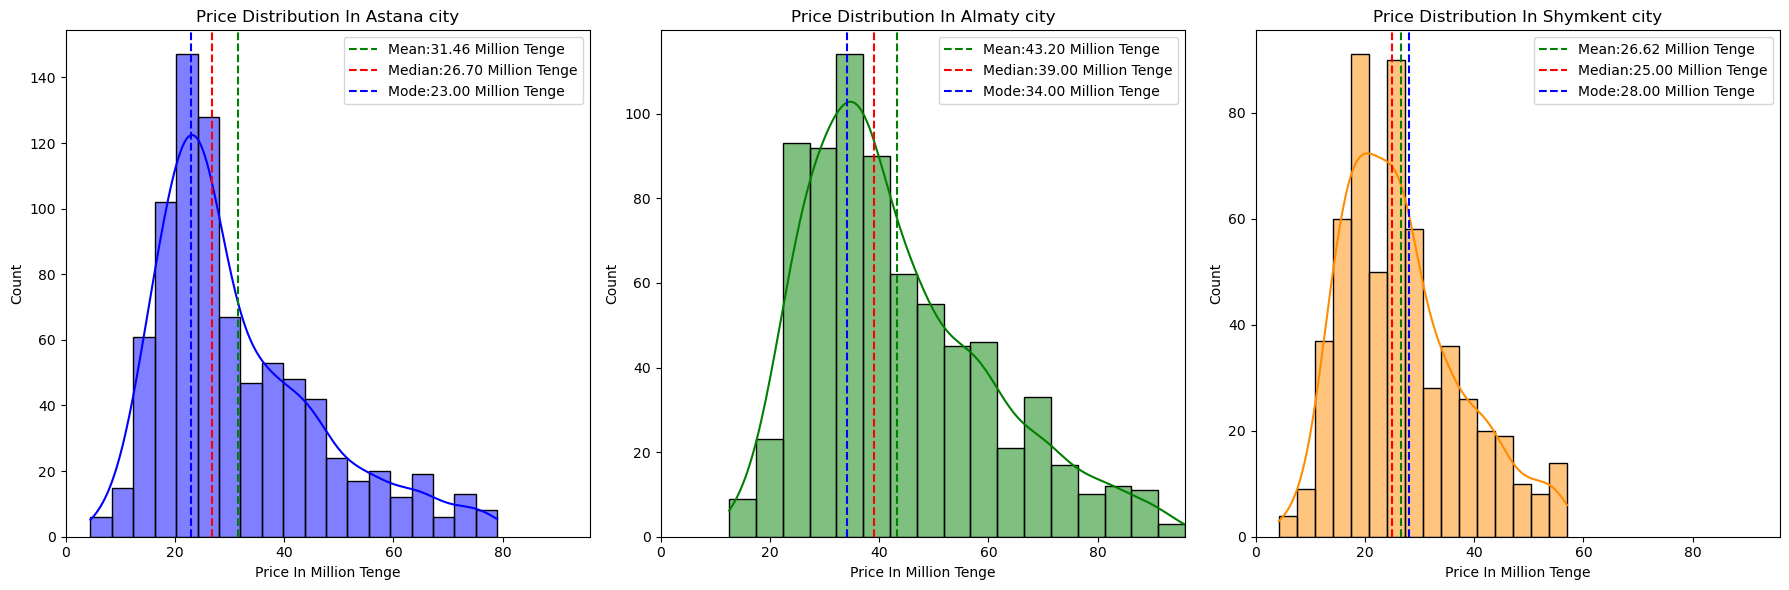

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 6))

# 1-й график для Астаны
plt.subplot(1, 3, 1)
df_astana_mean = df_final_filtered[df_final_filtered['Город']=='Астана']['Цена в тг'].mean()
df_astana_mode = df_final_filtered[df_final_filtered['Город']=='Астана']['Цена в тг'].mode()[0]
df_astana_median = df_final_filtered[df_final_filtered['Город']=='Астана']['Цена в тг'].median()

sns.histplot(x='Цена в тг', data=df_final_filtered[df_final_filtered['Город']=='Астана'], palette=['blue'], kde=True, hue=False)
plt.axvline(df_astana_mean, color='Green', linestyle='--', label=f'Mean:{df_astana_mean:.2f} Million Tenge')
plt.axvline(df_astana_median, color='red', linestyle='--', label=f'Median:{df_astana_median:.2f} Million Tenge')
plt.axvline(df_astana_mode, color='blue', linestyle='--', label=f'Mode:{df_astana_mode:.2f} Million Tenge')
plt.title('Price Distribution In Astana city')
plt.xlabel('Price In Million Tenge')
plt.ylabel('Count')
plt.xlim(0, max(df_final_filtered['Цена в тг']))
plt.legend()

# 2-й график для Алматы
plt.subplot(1, 3, 2)
df_almaty_mean = df_final_filtered[df_final_filtered['Город']=='Алматы']['Цена в тг'].mean()
df_almaty_mode = df_final_filtered[df_final_filtered['Город']=='Алматы']['Цена в тг'].mode()[0]
df_almaty_median = df_final_filtered[df_final_filtered['Город']=='Алматы']['Цена в тг'].median()

sns.histplot(x='Цена в тг', data=df_final_filtered[df_final_filtered['Город']=='Алматы'], palette=['green'], kde=True, hue=False)
plt.axvline(df_almaty_mean, color='Green', linestyle='--', label=f'Mean:{df_almaty_mean:.2f} Million Tenge')
plt.axvline(df_almaty_median, color='red', linestyle='--', label=f'Median:{df_almaty_median:.2f} Million Tenge')
plt.axvline(df_almaty_mode, color='blue', linestyle='--', label=f'Mode:{df_almaty_mode:.2f} Million Tenge')
plt.title('Price Distribution In Almaty city')
plt.xlabel('Price In Million Tenge')
plt.ylabel('Count')
plt.xlim(0, max(df_final_filtered['Цена в тг']))
plt.legend()

# 3-й график для Шымкента
plt.subplot(1, 3, 3)
df_shymkent_mean = df_final_filtered[df_final_filtered['Город']=='Шымкент']['Цена в тг'].mean()
df_shemkent_mode = df_final_filtered[df_final_filtered['Город']=='Шымкент']['Цена в тг'].mode()[0]
df_shymkent_median = df_final_filtered[df_final_filtered['Город']=='Шымкент']['Цена в тг'].median()

sns.histplot(x='Цена в тг', data=df_final_filtered[df_final_filtered['Город']=='Шымкент'], palette=['darkorange'], kde=True, hue=False)
plt.axvline(df_shymkent_mean, color='green', linestyle='--', label=f'Mean:{df_shymkent_mean:.2f} Million Tenge')
plt.axvline(df_shymkent_median, color='red', linestyle='--', label=f'Median:{df_shymkent_median:.2f} Million Tenge')
plt.axvline(df_shemkent_mode, color='blue', linestyle='--', label=f'Mode:{df_shemkent_mode:.2f} Million Tenge')
plt.title('Price Distribution In Shymkent city')
plt.xlabel('Price In Million Tenge')
plt.ylabel('Count')
plt.xlim(0, max(df_final_filtered['Цена в тг']))
plt.legend()


plt.tight_layout()
plt.show()

In [12]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

df_astana = df_final_filtered[df_final_filtered['Город'] == 'Астана']

df_astana_mean = df_astana['Цена в тг'].mean()
df_astana_median = df_astana['Цена в тг'].median()
df_astana_mode = df_astana['Цена в тг'].mode()[0]

fig_astana = go.Figure()

fig_astana.add_trace(go.Histogram(x=df_astana['Цена в тг'], nbinsx=50, name='Astana', marker=dict(color='blue', opacity=0.6)))

fig_astana.add_trace(go.Scatter(x=[df_astana_mean, df_astana_mean], y=[0, max(df_astana['Цена в тг'])], 
                               mode='lines', line=dict(color='green', dash='dash'),
                               name=f'Mean: {df_astana_mean:.2f} Million Tenge'))

fig_astana.add_trace(go.Scatter(x=[df_astana_median, df_astana_median], y=[0, max(df_astana['Цена в тг'])], 
                               mode='lines', line=dict(color='red', dash='dash'),
                               name=f'Median: {df_astana_median:.2f} Million Tenge'))

fig_astana.add_trace(go.Scatter(x=[df_astana_mode, df_astana_mode], y=[0, max(df_astana['Цена в тг'])], 
                               mode='lines', line=dict(color='blue', dash='dash'),
                               name=f'Mode: {df_astana_mode:.2f} Million Tenge'))

fig_astana.update_layout(
    title_text="Price Distribution In Astana City", 
    height=800,  
    width=1500,  
    xaxis_title="Price In Million Tenge",
    yaxis_title="Count",
    bargap=0.1,
    plot_bgcolor='white',  
    font=dict(family="Arial", size=12, color="black"),  
    xaxis=dict(
        showgrid=True, 
        gridcolor='lightgray', 
        zeroline=True,  
        zerolinecolor='black',  
        zerolinewidth=1  
    ),
    yaxis=dict(
        showgrid=True,  
        gridcolor='lightgray', 
        zeroline=True,  
        zerolinecolor='black',  
        zerolinewidth=1  
    )
)


fig_astana.show()

In [13]:
import plotly.graph_objects as go

df_almaty = df_final_filtered[df_final_filtered['Город'] == 'Алматы']
df_almaty_mean = df_almaty['Цена в тг'].mean()
df_almaty_median = df_almaty['Цена в тг'].median()
df_almaty_mode = df_almaty['Цена в тг'].mode()[0]

fig_almaty = go.Figure()


fig_almaty.add_trace(go.Histogram(x=df_almaty['Цена в тг'], nbinsx=50, name='Almaty', marker=dict(color='green', opacity=0.6)))

fig_almaty.add_trace(go.Scatter(x=[df_almaty_mean, df_almaty_mean], y=[0, max(df_almaty['Цена в тг'])], 
                               mode='lines', line=dict(color='green', dash='dash'),
                               name=f'Mean: {df_almaty_mean:.2f} Million Tenge' ))


fig_almaty.add_trace(go.Scatter(x=[df_almaty_median, df_almaty_median], y=[0, max(df_almaty['Цена в тг'])], 
                               mode='lines', line=dict(color='red', dash='dash'),
                               name=f'Median: {df_almaty_median:.2f} Million Tenge'))

fig_almaty.add_trace(go.Scatter(x=[df_almaty_mode, df_almaty_mode], y=[0, max(df_almaty['Цена в тг'])], 
                               mode='lines', line=dict(color='blue', dash='dash'),
                               name=f'Mode: {df_almaty_mode:.2f} Million Tenge'))

fig_almaty.update_layout(
    title_text="Price Distribution In Almaty City", 
    height=800, 
    width=1500,
    xaxis_title="Price In Million Tenge",
    yaxis_title="Count",
    bargap=0.1,
    plot_bgcolor='white',  
    font=dict(family="Arial", size=12, color="black"),
    xaxis=dict(
        showgrid=True, 
        gridcolor='lightgray', 
        zeroline=True,  
        zerolinecolor='black', 
        zerolinewidth=1 
    ),
    yaxis=dict(
        showgrid=True,  
        gridcolor='lightgray', 
        zeroline=True, 
        zerolinecolor='black', 
        zerolinewidth=1  
    )
)

fig_almaty.show()

In [14]:
import plotly.graph_objects as go

df_shymkent = df_final_filtered[df_final_filtered['Город'] == 'Шымкент']
df_shymkent_mean = df_shymkent['Цена в тг'].mean()
df_shymkent_median = df_shymkent['Цена в тг'].median()
df_shymkent_mode = df_shymkent['Цена в тг'].mode()[0]

fig_shymkent = go.Figure()

fig_shymkent.add_trace(go.Histogram(x=df_shymkent['Цена в тг'], nbinsx=50, name='Shymkent', marker=dict(color='tomato', opacity=0.6)))

fig_shymkent.add_trace(go.Scatter(x=[df_shymkent_mean, df_shymkent_mean], y=[0, max(df_shymkent['Цена в тг'])], 
                                 mode='lines', line=dict(color='green', dash='dash'),
                                 name=f'Mean: {df_shymkent_mean:.2f} Million Tenge'))

fig_shymkent.add_trace(go.Scatter(x=[df_shymkent_median, df_shymkent_median], y=[0, max(df_shymkent['Цена в тг'])], 
                                 mode='lines', line=dict(color='red', dash='dash'),
                                 name=f'Median: {df_shymkent_median:.2f} Million Tenge'))

fig_shymkent.add_trace(go.Scatter(x=[df_shymkent_mode, df_shymkent_mode], y=[0, max(df_shymkent['Цена в тг'])], 
                                 mode='lines', line=dict(color='blue', dash='dash'),
                                 name=f'Mode: {df_shymkent_mode:.2f} Million Tenge'))

fig_shymkent.update_layout(
    title_text="Price Distribution In Shymkent City", 
    height=800, 
    width=1500,
    xaxis_title="Price In Million Tenge",
    yaxis_title="Count",
    bargap=0.1,
    plot_bgcolor='white', 
    font=dict(family="Arial", size=12, color="black"),
    xaxis=dict(
        showgrid=True,  
        gridcolor='lightgray',  
        zeroline=True,  
        zerolinecolor='black', 
        zerolinewidth=1  
    ),
    yaxis=dict(
        showgrid=True,  
        gridcolor='lightgray',  
        zeroline=True, 
        zerolinecolor='black',  
        zerolinewidth=1  
    )
)

fig_shymkent.show()

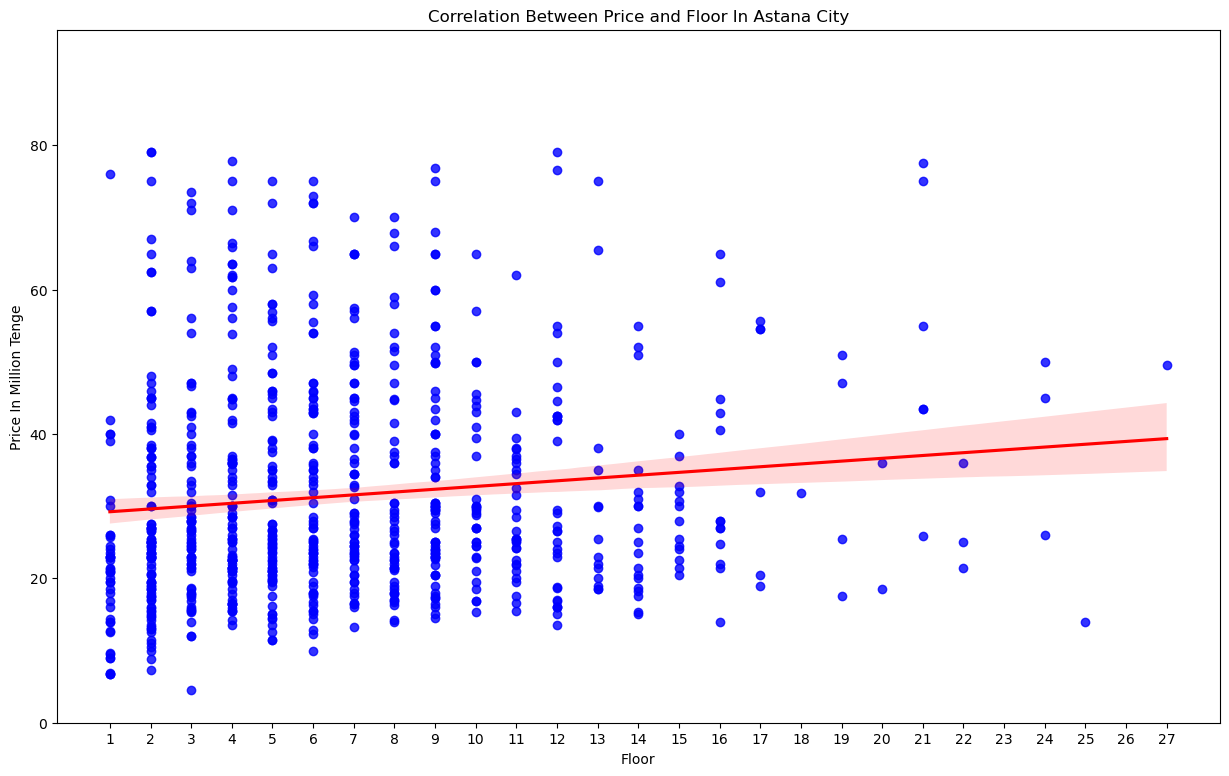

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 9))
sns.regplot(
    x='Этаж_кв',
    y='Цена в тг',
    data=df_final_filtered[df_final_filtered['Город'] == 'Астана'],
    scatter_kws={'color': 'blue'}, 
    line_kws={'color': 'red'},  
)

plt.title('Correlation Between Price and Floor In Astana City')
plt.ylim(0, max(df_final_filtered['Цена в тг']))
plt.xlabel('Floor')
plt.ylabel('Price In Million Tenge')

min_floor = int(df_final_filtered['Этаж_кв'].min())
max_floor = int(df_final_filtered['Этаж_кв'].max())
plt.xticks(range(min_floor, max_floor + 1))  

plt.show()

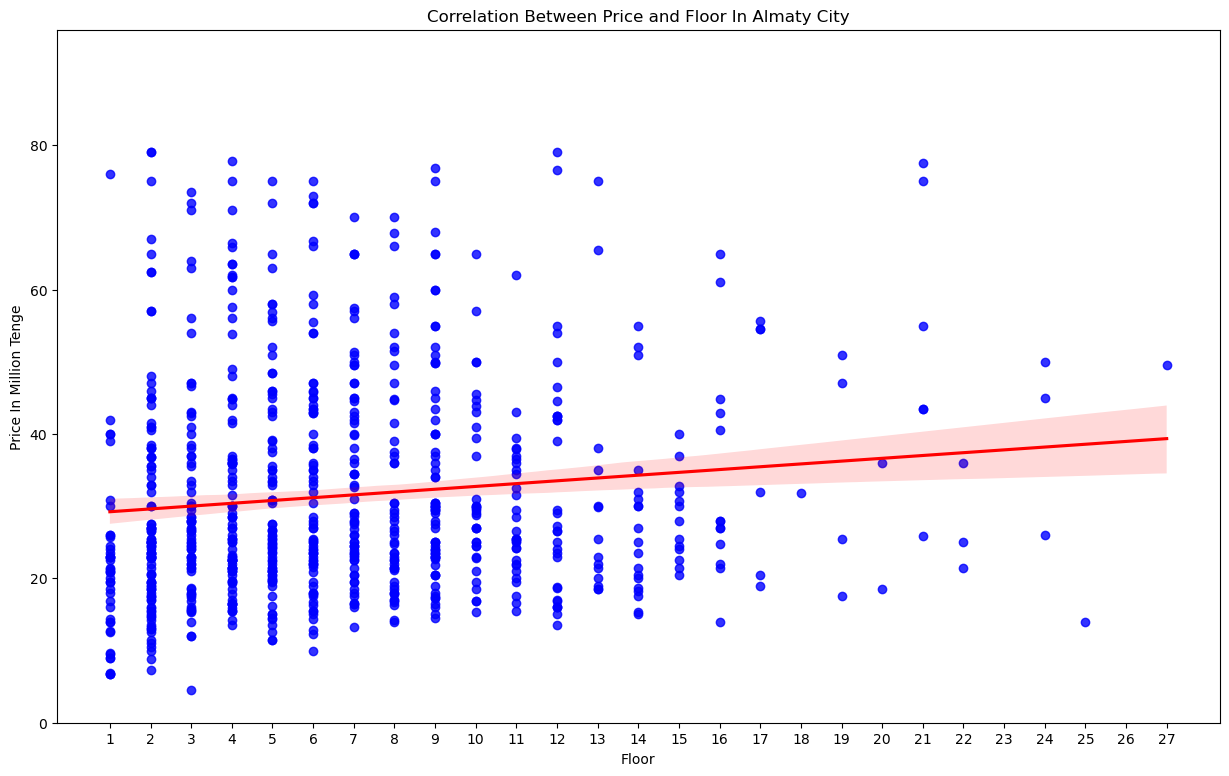

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 9))
sns.regplot(
    x='Этаж_кв',
    y='Цена в тг',
    data=df_final_filtered[df_final_filtered['Город'] == 'Алматы'],
    scatter_kws={'color': 'blue'},  
    line_kws={'color': 'red'},  
)

plt.title('Correlation Between Price and Floor In Almaty City')
plt.ylim(0, max(df_final_filtered['Цена в тг']))
plt.xlabel('Floor')
plt.ylabel('Price In Million Tenge')

min_floor = int(df_final_filtered['Этаж_кв'].min())
max_floor = int(df_final_filtered['Этаж_кв'].max())
plt.xticks(range(min_floor, max_floor + 1))  

plt.show()


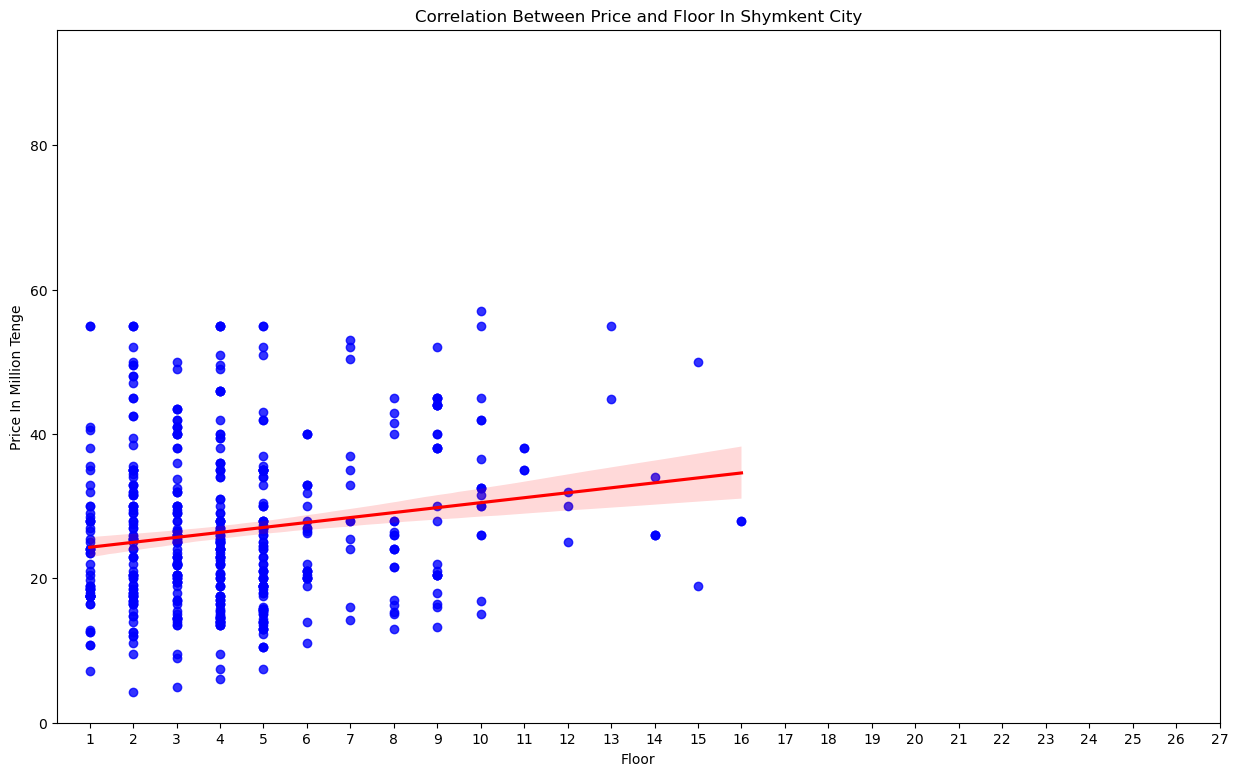

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 9))
sns.regplot(
    x='Этаж_кв',
    y='Цена в тг',
    data=df_final_filtered[df_final_filtered['Город'] == 'Шымкент'],
    scatter_kws={'color': 'blue'},  
    line_kws={'color': 'red'}, 
)

plt.title('Correlation Between Price and Floor In Shymkent City')
plt.ylim(0, max(df_final_filtered['Цена в тг']))
plt.xlabel('Floor')
plt.ylabel('Price In Million Tenge')

min_floor = int(df_final_filtered['Этаж_кв'].min())
max_floor = int(df_final_filtered['Этаж_кв'].max())
plt.xticks(range(min_floor, max_floor + 1))   

plt.show()

In [75]:
result_astana = df_astana_filtered.groupby(['Район', 'Тип дома'])[['Цена в тг', 'Площадь м2']].apply(lambda x: (x['Цена в тг'] / x['Площадь м2']).mean()).round(2)
pivot_result_astana = result_astana.unstack(fill_value=0)
print('Price Distribution of types of Houses in Astana:')
pivot_result_astana

Price Distribution of types of Houses in Astana:


Тип дома,иной,кирпичный,монолитный,панельный
Район,,,,
Алматы р-н,501581.43,450021.26,490401.13,393088.89
Есильский р-н,557985.89,596319.50,594490.31,535592.73
Нура р-н,543173.30,518071.66,605136.09,0.00
Сарайшык р-н,0.00,344998.63,529099.76,0.00
Сарыарка р-н,300207.04,410358.20,420699.03,343035.15
р-н Байконур,388007.05,417411.39,442610.11,395383.25


In [22]:
result_almaty = df_almaty_filtered.groupby(['Район', 'Тип дома'])[['Цена в тг', 'Площадь м2']].apply(lambda x: (x['Цена в тг'] / x['Площадь м2']).mean()).round(2)
pivot_result_almaty = result_almaty.unstack(fill_value=0)
print('Price Distribution of types of Houses in Almaty:')
pivot_result_almaty

Price Distribution of types of Houses in Almaty:


Тип дома,иной,кирпичный,монолитный,панельный
Район,,,,
Алатауский р-н,0.00,579612.28,553833.13,471910.11
Алмалинский р-н,0.00,725992.69,851269.51,738605.85
Ауэзовский р-н,0.00,629735.72,661764.46,621904.75
Бостандыкский р-н,0.00,672582.88,844002.50,722757.75
Жетысуский р-н,0.00,642857.14,619685.11,568352.24
Медеуский р-н,598145.90,992474.54,841727.01,789066.32
Наурызбайский р-н,521936.46,782265.03,558967.11,0.00
Турксибский р-н,0.00,531009.87,563339.44,562081.96


In [23]:
result_shymkent = df_shymkent_filtered .groupby(['Район', 'Тип дома'])[['Цена в тг', 'Площадь м2']].apply(lambda x: (x['Цена в тг'] / x['Площадь м2']).mean()).round(2)
pivot_result_shymkent = result_shymkent.unstack(fill_value=0)
print('Price Distribution of types of Houses in Shymkent:')
pivot_result_shymkent

Price Distribution of types of Houses in Shymkent:


Тип дома,иной,кирпичный,монолитный,панельный
Район,,,,
Абайский р-н,0.00,390423.87,512612.66,361489.05
Аль-Фарабийский р-н,0.00,408945.26,462409.08,365328.33
Енбекшинский р-н,0.00,391361.90,430810.84,374141.26
Каратауский р-н,451476.39,435728.26,469505.93,349113.76
Туран р-н,460108.05,400094.47,430931.10,395140.11


In [26]:
result = df_astana.groupby(["Район", "Комната", "Этаж_кв"]).agg({"Цена в тг": "mean"}).reset_index()
result["Средняя цена (млн тг)"] = result["Цена в тг"]
result = result.drop(columns=["Цена в тг"])
result

,Район,Комната,Этаж_кв,Средняя цена (млн тг)
0,Алматы р-н,1,1,9.662500
1,Алматы р-н,1,2,17.200000
2,Алматы р-н,1,3,18.371400
3,Алматы р-н,1,4,17.859091
4,Алматы р-н,1,5,17.750000
...,...,...,...,...
221,р-н Байконур,3,9,39.999000
222,р-н Байконур,3,10,25.000000
223,р-н Байконур,4,5,22.000000
224,р-н Байконур,4,11,62.000000


In [76]:
result = df_almaty.groupby(["Район", "Комната", "Этаж_кв"]).agg({"Цена в тг": "mean"}).reset_index()
result["Средняя цена (млн тг)"] = result["Цена в тг"]
result = result.drop(columns=["Цена в тг"])
result

,Район,Комната,Этаж_кв,Средняя цена (млн тг)
0,Алатауский р-н,1,1,2.117778e+07
1,Алатауский р-н,1,3,2.362222e+07
2,Алатауский р-н,1,4,2.200000e+07
3,Алатауский р-н,1,5,2.550000e+07
4,Алатауский р-н,1,6,3.000000e+07
...,...,...,...,...
219,Турксибский р-н,3,1,3.222692e+07
220,Турксибский р-н,3,2,3.766667e+07
221,Турксибский р-н,3,7,4.862500e+07
222,Турксибский р-н,3,9,3.630000e+07


In [77]:
result = df_shymkent.groupby(["Район", "Комната", "Этаж_кв"]).agg({"Цена в тг": "mean"}).reset_index()
result["Средняя цена (млн тг)"] = result["Цена в тг"]
result = result.drop(columns=["Цена в тг"])
result

,Район,Комната,Этаж_кв,Средняя цена (млн тг)
0,Абайский р-н,1,1,1.250000e+07
1,Абайский р-н,1,2,1.100000e+07
2,Абайский р-н,1,3,1.762500e+07
3,Абайский р-н,1,5,1.983000e+07
4,Абайский р-н,1,6,2.713280e+07
...,...,...,...,...
152,Туран р-н,4,3,4.100000e+07
153,Туран р-н,4,4,3.066667e+07
154,Туран р-н,4,8,5.733333e+07
155,Туран р-н,5,2,4.825000e+07


In [37]:
def calculate_score(row):
    score = 0
    if row['Год Постройки'] >= 2022:
        score += 3
    elif 2010 <= row['Год Постройки'] < 2022:
        score += 2
    else:
        score += 1

    if row['Тип дома'] == 'монолитный':
        score += 3
    elif row['Тип дома'] == 'кирпичный':
        score += 2
    else:
        score += 1

    if row['Этаж_кв'] > 10:
        score += 3
    elif 5 <=row['Этаж_кв'] <= 10:
        score += 2
    else:
        score += 1

    if row['Цена в тг'] <= 27000000:
        score += 3
    elif 27000000 < row['Цена в тг'] <= 40000000:
        score += 2
    else:
        score += 1

    return score

df_astana['Перспективность'] = df_astana.apply(calculate_score, axis=1)

average_score_by_district = df_astana.groupby('Район')['Перспективность'].mean().reset_index()

# Create a bar chart using Plotly
import plotly.express as px

fig = px.bar(
    average_score_by_district,
    x='Перспективность',
    y='Район',
    orientation='h',
    title='Average prospects by district in Astana',
    text='Перспективность',
    color='Перспективность',
    color_continuous_scale='Purples'
)

fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(
    xaxis_title='Average Prospects',
    yaxis_title='District',
    showlegend=False,
    title_font_size=16
)

fig.show()

C:\Users\rakhi\AppData\Local\Temp\ipykernel_21484\701171315.py:33: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [38]:
def calculate_score(row):
    score = 0
    if row['Год Постройки'] >= 2022:
        score += 3
    elif 2000 <= row['Год Постройки'] <= 2022:
        score += 2
    else:
        score += 1

    if row['Тип дома'] == 'монолитный':
        score += 3
    elif row['Тип дома'] == 'кирпичный':
        score += 2
    else:
        score += 1

    if 7>row['Этаж_кв']>=1 :
        score += 3
    elif row['Этаж_кв']>6 :
        score += 2
    else:
        score += 1

    if row['Цена в тг'] <= 40000000:
        score += 3
    elif 54000000 > row['Цена в тг'] > 40000000:
        score += 2
    else:
        score += 1

    return score

df_almaty['Перспективность'] = df_almaty.apply(calculate_score, axis=1)

average_score_by_district = df_almaty.groupby('Район')['Перспективность'].mean().reset_index()

# Create a bar chart using Plotly
import plotly.express as px

fig = px.bar(
    average_score_by_district,
    x='Перспективность',
    y='Район',
    orientation='h',
    title='Average prospects by district in Almaty',
    text='Перспективность',
    color='Перспективность',
    color_continuous_scale='Purples'
)

fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(
    xaxis_title='Average Prospects',
    yaxis_title='District',
    showlegend=False,
    title_font_size=16
)

fig.show()


C:\Users\rakhi\AppData\Local\Temp\ipykernel_21484\3185144557.py:33: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [39]:
def calculate_score(row):
    score = 0
    if row['Год Постройки'] >= 2022:
        score += 3
    elif 2000 <= row['Год Постройки'] < 2022:
        score += 2
    else:
        score += 1

    if row['Тип дома'] == 'монолитный':
        score += 3
    elif row['Тип дома'] == 'кирпичный':
        score += 2
    else:
        score += 1

    if row['Этаж_кв'] > 10:
        score += 3
    elif 5 <=row['Этаж_кв'] <= 10 :
        score += 2
    else:
        score += 1

    if row['Цена в тг'] <= 25000000:
        score += 3
    elif 33000000 > row['Цена в тг'] > 250000000:
        score += 2
    else:
        score += 1

    return score

df_shymkent['Перспективность'] = df_shymkent.apply(calculate_score, axis=1)

average_score_by_district = df_shymkent.groupby('Район')['Перспективность'].mean().reset_index()

# Create a bar chart using Plotly
import plotly.express as px

fig = px.bar(
    average_score_by_district,
    x='Перспективность',
    y='Район',
    orientation='h',
    title='Average prospects by district in Shymkent',
    text='Перспективность',
    color='Перспективность',
    color_continuous_scale='Purples'
)

fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(
    xaxis_title='Average Prospects',
    yaxis_title='District',
    showlegend=False,
    title_font_size=16
)

fig.show()

C:\Users\rakhi\AppData\Local\Temp\ipykernel_21484\869440409.py:33: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [29]:

average_price_by_district = df_astana.groupby("Район")["Цена в тг"].mean().reset_index()

average_price_by_district = average_price_by_district.sort_values(by="Цена в тг")

fig = px.line(
    average_price_by_district,
    x="Район",
    y="Цена в тг",
    title="Average Housing Price by District in Astana",
    markers=True,
    labels={"Район": "District", "Цена в тг": "Average Price (₸)"}
)

fig.update_traces(line_color="purple")
fig.update_layout(
    xaxis_title="District",
    yaxis_title="Average Price (₸)",
    xaxis_tickangle=45,
    template="plotly_white"
)
fig.show()

In [30]:

average_price_by_district = df_almaty.groupby("Район")["Цена в тг"].mean().reset_index()

average_price_by_district = average_price_by_district.sort_values(by="Цена в тг")

fig = px.line(
    average_price_by_district,
    x="Район",
    y="Цена в тг",
    title="Average Housing Price by District in Almaty",
    markers=True,
    labels={"Район": "District", "Цена в тг": "Average Price (₸)"}
)

fig.update_traces(line_color="purple")
fig.update_layout(
    xaxis_title="District",
    yaxis_title="Average Price (₸)",
    xaxis_tickangle=45,
    template="plotly_white"
)
fig.show()

In [31]:

average_price_by_district = df_shymkent.groupby("Район")["Цена в тг"].mean().reset_index()

average_price_by_district = average_price_by_district.sort_values(by="Цена в тг")

fig = px.line(
    average_price_by_district,
    x="Район",
    y="Цена в тг",
    title="Average Housing Price by District in Shymkent",
    markers=True,
    labels={"Район": "District", "Цена в тг": "Average Price (₸)"}
)

fig.update_traces(line_color="purple")
fig.update_layout(
    xaxis_title="District",
    yaxis_title="Average Price (₸)",
    xaxis_tickangle=45,
    template="plotly_white"
)
fig.show()

In [33]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Calculate floor counts for each city
floor_counts_astana = df_astana['Этаж_кв'].value_counts().sort_index()
floor_counts_shymkent = df_shymkent['Этаж_кв'].value_counts().sort_index()
floor_counts_almaty = df_almaty['Этаж_кв'].value_counts().sort_index()

# Create subplots
fig = make_subplots(rows=1, cols=3, subplot_titles=("Astana", "Shymkent", "Almaty"))

# Add bar plot for Astana
fig.add_trace(
    go.Bar(x=floor_counts_astana.index, y=floor_counts_astana.values, marker_color="purple", name="Astana"),
    row=1, col=1
)

# Add bar plot for Shymkent
fig.add_trace(
    go.Bar(x=floor_counts_shymkent.index, y=floor_counts_shymkent.values, marker_color="darkviolet", name="Shymkent"),
    row=1, col=2
)

# Add bar plot for Almaty
fig.add_trace(
    go.Bar(x=floor_counts_almaty.index, y=floor_counts_almaty.values, marker_color="mediumpurple", name="Almaty"),
    row=1, col=3
)

# Update layout
fig.update_layout(
    title_text="Distribution of Apartments by Floor in Astana, Shymkent, and Almaty",
    showlegend=False,
    template="plotly_white"
)

# Update axes labels
fig.update_xaxes(title_text="Floor", row=1, col=1)
fig.update_xaxes(title_text="Floor", row=1, col=2)
fig.update_xaxes(title_text="Floor", row=1, col=3)

fig.update_yaxes(title_text="Number of Apartments", row=1, col=1)
fig.update_yaxes(title_text="Number of Apartments", row=1, col=2)
fig.update_yaxes(title_text="Number of Apartments", row=1, col=3)

# Show figure
fig.show()

## Predictive analytics

In [65]:
import pandas as pd 

df = pd.read_csv('krisha_cleaned.csv')
df

,Краткая информация,Тип дома,Город,Год Постройки,Площадь м2,Комната,Район,Цена в тг,Этаж_кв,Этаж_макс
0,"2-комнатная квартира · 76.3 м² · 15/18 этаж, К...",монолитный,Астана,2016,76.3,2,Алматы р-н,30000000,15,18
1,"1-комнатная квартира · 35.8 м² · 4/9 этаж, Ама...",кирпичный,Астана,2022,35.8,1,Алматы р-н,16600000,4,9
2,"3-комнатная квартира · 96 м² · 4/9 этаж, Бокей...",монолитный,Астана,2022,96.0,3,Есильский р-н,77800000,4,9
3,"3-комнатная квартира · 130 м² · 4/7 этаж, Шамш...",монолитный,Астана,2019,130.0,3,Алматы р-н,155000000,4,7
4,"3-комнатная квартира · 67 м² · 12/17 этаж, Тол...",монолитный,Астана,2024,67.0,3,Есильский р-н,42500000,12,17
...,...,...,...,...,...,...,...,...,...,...
2283,"2-комнатная квартира · 54 м² · 9/25 этаж, Байд...",монолитный,Шымкент,2024,54.0,2,Абайский р-н,40000000,9,25
2284,"3-комнатная квартира · 59 м² · 3/5 этаж, Манге...",панельный,Шымкент,1966,59.0,3,Туран р-н,30000000,3,5
2285,"3-комнатная квартира · 62 м² · 4/5 этаж, 16-й ...",панельный,Шымкент,1975,62.0,3,Енбекшинский р-н,25500000,4,5
2286,"3-комнатная квартира · 62 м² · 5/5 этаж, Дулати 8",кирпичный,Шымкент,1975,62.0,3,Аль-Фарабийский р-н,23000000,5,5


In [66]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
import numpy as np

categorical_columns = ['Тип дома', 'Город', 'Район']

encoder = OneHotEncoder(sparse_output=False, drop='first')  
encoded_data = encoder.fit_transform(df[categorical_columns])
encoded_df = pd.DataFrame(
    encoded_data, 
    columns=encoder.get_feature_names_out(categorical_columns)
)

In [67]:
data_processed = pd.concat([df.drop(columns=categorical_columns), encoded_df], axis=1)

In [68]:
data_processed.drop(columns='Краткая информация', inplace=True)

In [69]:
numerical_columns = ['Год Постройки', 'Площадь м2', 'Комната', 'Этаж_кв', 'Этаж_макс']
scaler = StandardScaler()
data_processed[numerical_columns] = scaler.fit_transform(data_processed[numerical_columns])

In [72]:
data_processed

,Год Постройки,Площадь м2,Комната,Цена в тг,Этаж_кв,Этаж_макс,Тип дома_кирпичный,Тип дома_монолитный,Тип дома_панельный,Город_Астана,...,Район_Жетысуский р-н,Район_Каратауский р-н,Район_Медеуский р-н,Район_Наурызбайский р-н,Район_Нура р-н,Район_Сарайшык р-н,Район_Сарыарка р-н,Район_Туран р-н,Район_Турксибский р-н,Район_р-н Байконур
0,0.371492,0.208950,-0.293449,30000000,2.203144,1.607061,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.709835,-0.946159,-1.340895,16600000,-0.475280,-0.160517,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.709835,0.770818,0.753996,77800000,-0.475280,-0.160517,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.540664,1.740539,0.753996,155000000,-0.475280,-0.553312,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.822616,-0.056297,0.753996,42500000,1.472665,1.410663,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2283,0.822616,-0.427073,-0.293449,40000000,0.742186,2.981844,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2284,-2.448032,-0.284467,0.753996,30000000,-0.718773,-0.946107,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2285,-1.940518,-0.198904,0.753996,25500000,-0.475280,-0.946107,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2286,-1.940518,-0.198904,0.753996,23000000,-0.231787,-0.946107,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [70]:
correlation_matrix = data_processed.corr()
target_correlation = correlation_matrix['Цена в тг'].sort_values(ascending=False)

Text(0.5, 1.0, 'Correlation Matrix Heatmap')

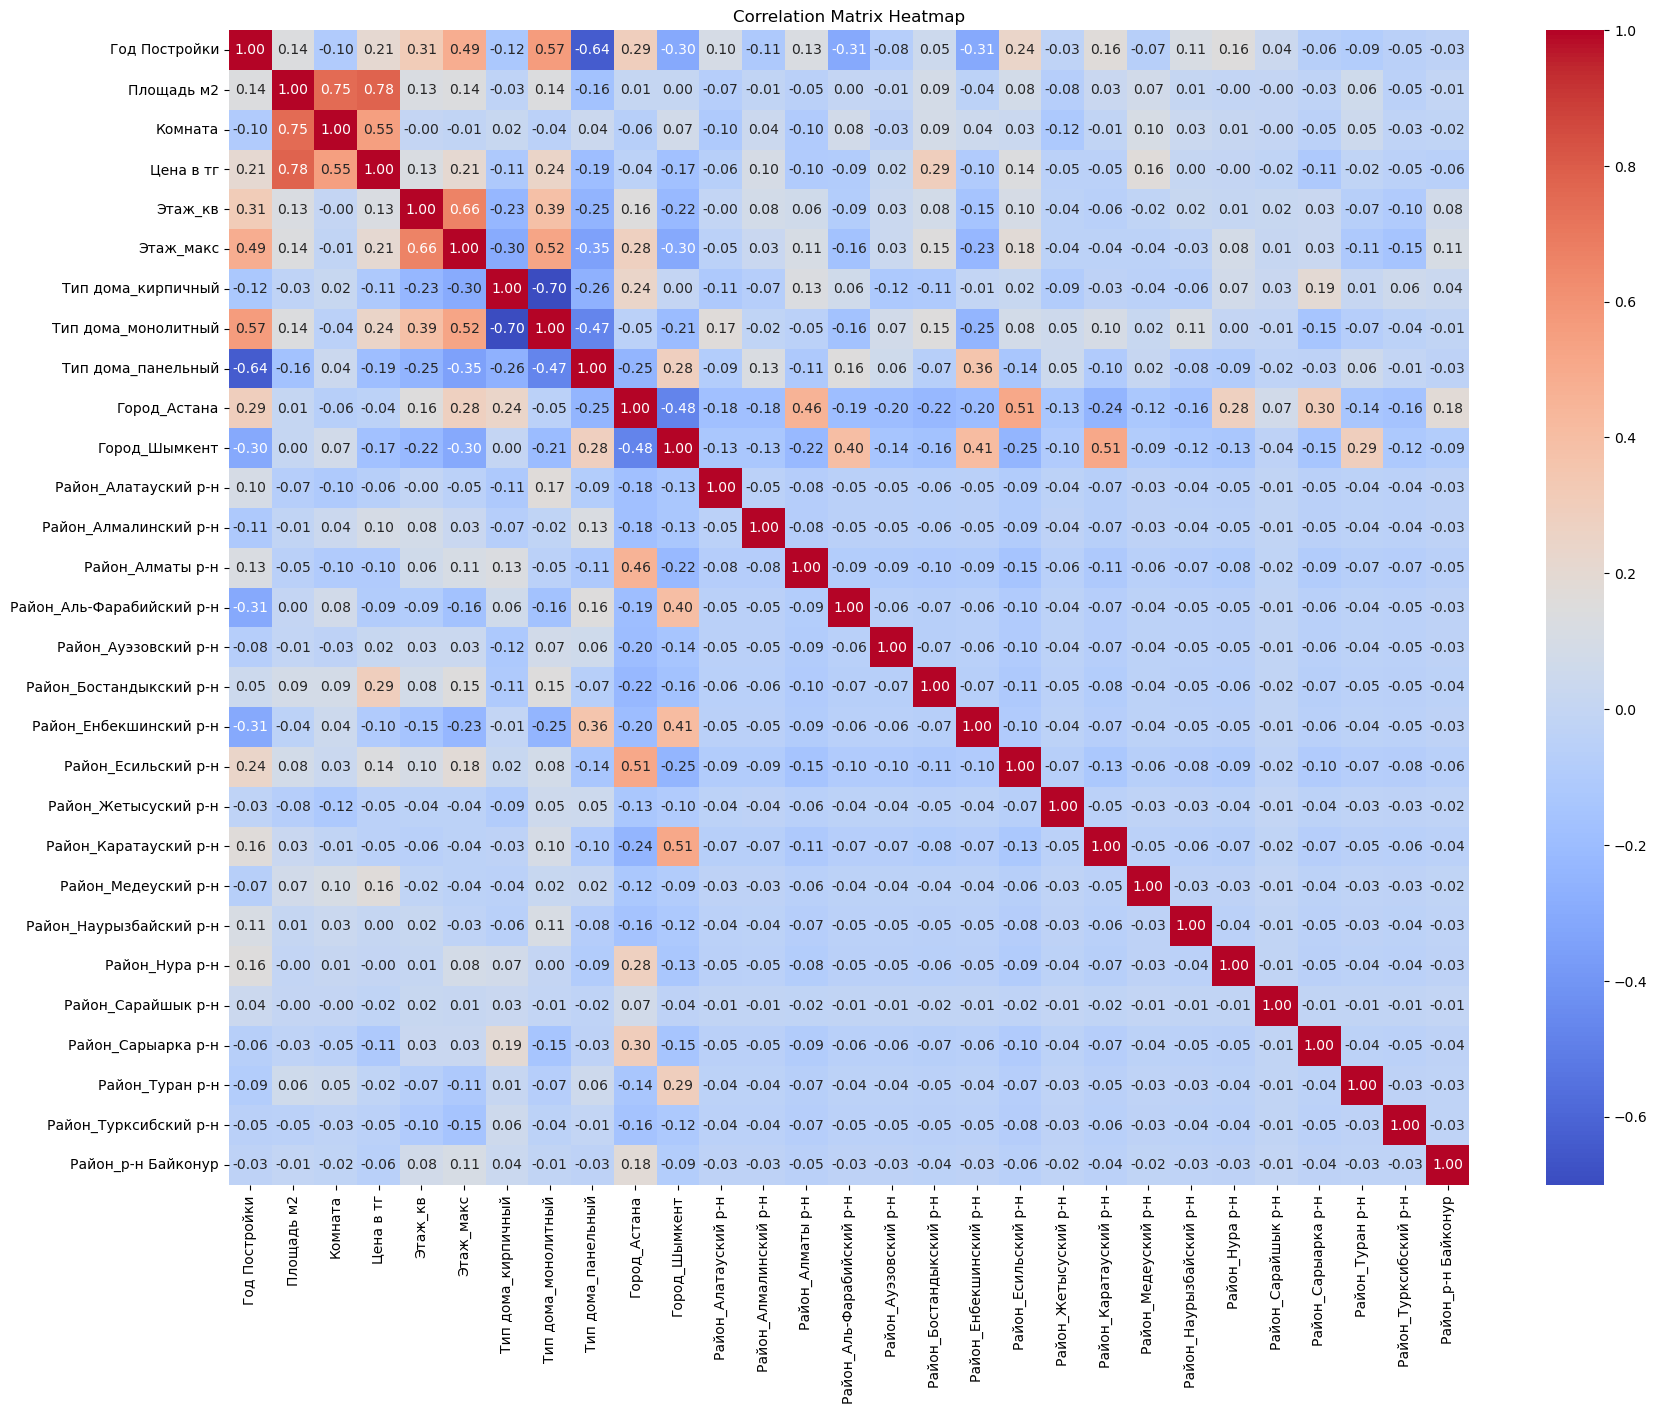

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Correlation Matrix Heatmap')

In [18]:
target_correlation

Цена в тг                    1.000000
Площадь м2                   0.777930
Комната                      0.550750
Район_Бостандыкский р-н      0.290379
Тип дома_монолитный          0.243877
Этаж_макс                    0.206468
Год Постройки                0.205849
Район_Медеуский р-н          0.164492
Район_Есильский р-н          0.139229
Этаж_кв                      0.127552
Район_Алмалинский р-н        0.099741
Район_Ауэзовский р-н         0.019475
Район_Наурызбайский р-н      0.004866
Район_Нура р-н              -0.001054
Район_Сарайшык р-н          -0.016778
Район_Туран р-н             -0.022477
Город_Астана                -0.038457
Район_Жетысуский р-н        -0.045884
Район_Турксибский р-н       -0.046917
Район_Каратауский р-н       -0.049342
Район_р-н Байконур          -0.058577
Район_Алатауский р-н        -0.064930
Район_Аль-Фарабийский р-н   -0.090049
Район_Енбекшинский р-н      -0.101911
Район_Алматы р-н            -0.102106
Район_Сарыарка р-н          -0.109936
Тип дома_кир

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X = data_processed.drop(columns=['Цена в тг'])  # Features
y = data_processed['Цена в тг']  # Target

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42, n_jobs=-1),
    "XGBoost": XGBRegressor(random_state=42, n_jobs=-1)
}

results = []
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate performance
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results.append({"Model": name, "MAE": mae, "MSE": mse, "R2": r2})

# Convert results to a DataFrame for easy viewing
results_df = pd.DataFrame(results)
print(results_df) 


               Model           MAE           MSE        R2
0  Linear Regression  8.395928e+06  1.687421e+14  0.773187
1      Decision Tree  7.042415e+06  2.159115e+14  0.709785
2      Random Forest  5.845004e+06  1.460118e+14  0.803740
3            XGBoost  6.220652e+06  1.985754e+14  0.733087


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Hyperparameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
MAE: 5877865.801748544, MSE: 150322437877521.7, R2: 0.7979457738155342


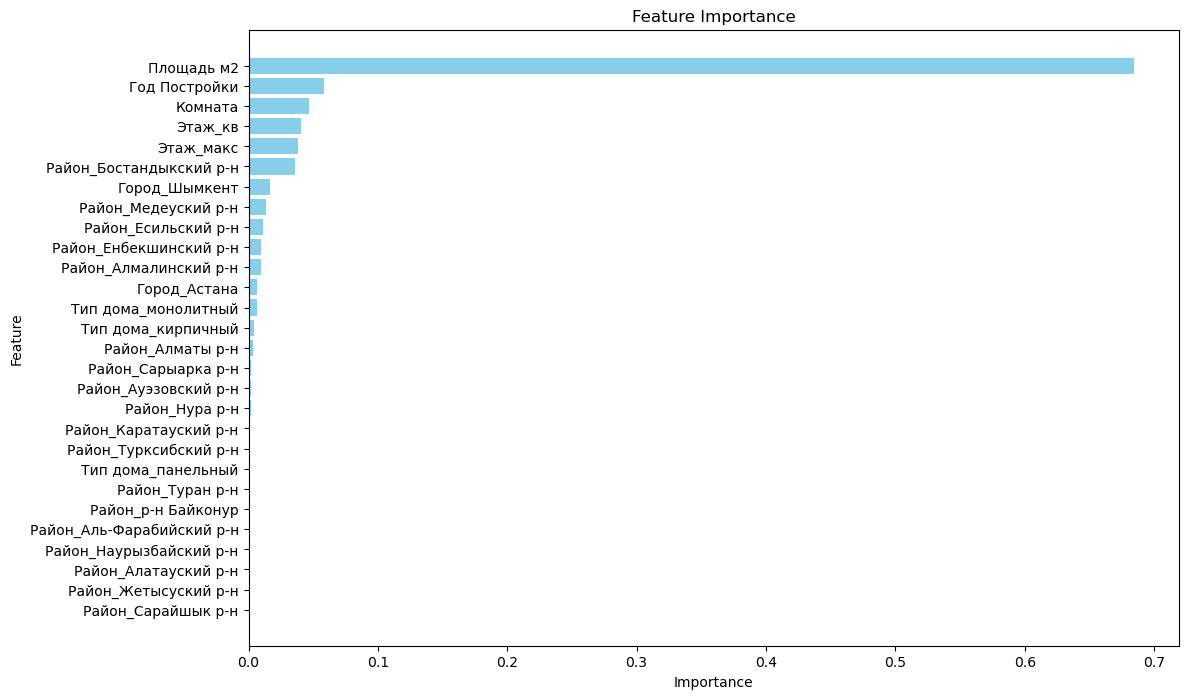

Cross-Validation R2 Scores: [0.6379253  0.65576948 0.69297447 0.58889067 0.64787429]
Mean R2 Score: 0.6446868430786894


In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

X = data_processed.drop(columns=['Цена в тг'])  # Inputs
y = data_processed['Цена в тг']  # Target

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 1: Hyperparameter Tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

rf = RandomForestRegressor(random_state=42, n_jobs=-1)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters from GridSearchCV
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the Random Forest Regressor with the best parameters
best_rf = RandomForestRegressor(**best_params, random_state=42, n_jobs=-1)
best_rf.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = best_rf.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MAE: {mae}, MSE: {mse}, R2: {r2}")

# Step 2: Feature Importance Analysis
feature_importances = best_rf.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)


# Step 3: Cross-Validation
cv_scores = cross_val_score(best_rf, X, y, cv=5, scoring='r2', n_jobs=-1)
print(f"Cross-Validation R2 Scores: {cv_scores}")
print(f"Mean R2 Score: {np.mean(cv_scores)}")


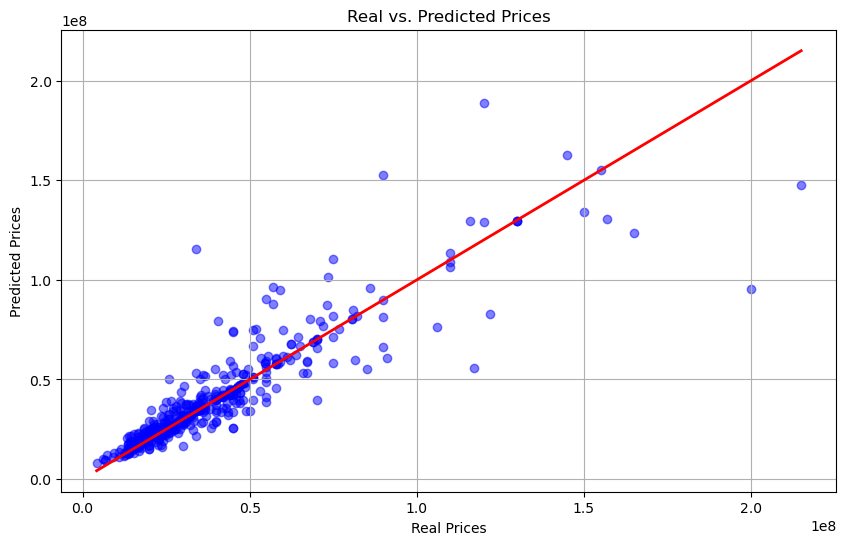

In [21]:
# Scatter Plot: Real vs. Predicted Prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color="blue")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linewidth=2)  # Perfect prediction line
plt.title("Real vs. Predicted Prices")
plt.xlabel("Real Prices")
plt.ylabel("Predicted Prices")
plt.grid()

In [23]:

y_pred = np.round(y_pred, 2)
summary = pd.DataFrame({
    "Metric": ["Mean", "Median", "Standard Deviation"],
    "Real Prices": [np.mean(y_test), np.median(y_test), np.std(y_test)],
    "Predicted Prices": [np.mean(y_pred), np.median(y_pred), np.std(y_pred)],
})
summary

,Metric,Real Prices,Predicted Prices
0,Mean,3.917045e+07,4.001884e+07
1,Median,3.200000e+07,3.307460e+07
2,Standard Deviation,2.727583e+07,2.641551e+07


In [24]:
comparison_df = pd.DataFrame({"Real Prices": y_test, "Predicted Prices": y_pred})
comparison_df

,Real Prices,Predicted Prices
1249,26500000,2.648600e+07
990,29900000,2.969450e+07
809,19500000,2.153042e+07
1043,90000000,8.975500e+07
736,34500000,3.812774e+07
...,...,...
118,12650000,1.197150e+07
220,36800000,3.145825e+07
2161,14000000,2.165934e+07
1292,61200000,6.120000e+07


In [25]:
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

accuracy = 100 - mape

In [26]:
accuracy

85.23543345570988

# Astana

In [49]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

df_astana = df[df['Город'] == 'Астана']
df_astana_encoded = pd.get_dummies(df_astana.drop(columns=['Краткая информация', 'Город']), drop_first=True)

# Step 3: Outlier Handling (Target Variable)
Q1 = df_astana_encoded['Цена в тг'].quantile(0.25)
Q3 = df_astana_encoded['Цена в тг'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_filtered = df_astana_encoded[(df_astana_encoded['Цена в тг'] >= lower_bound) & (df_astana_encoded['Цена в тг'] <= upper_bound)]

# Features and Target
X = df_filtered.drop(columns=['Цена в тг'])
y = df_filtered['Цена в тг']

# Log Transformation
y_log = np.log(y)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

rf = RandomForestRegressor(random_state=42, n_jobs=-1)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters from GridSearchCV
best_params = grid_search.best_params_

# Train the Random Forest Regressor with the best parameters
best_rf = RandomForestRegressor(**best_params, random_state=42, n_jobs=-1)
best_rf.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = best_rf.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Step 3: Feature Importance Analysis
feature_importances = best_rf.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

# Step 4: Cross-Validation
cv_scores = cross_val_score(best_rf, X, y, cv=5, scoring='r2', n_jobs=-1)

best_params, mae, mse, r2, importance_df, cv_scores, np.mean(cv_scores)


Fitting 5 folds for each of 27 candidates, totalling 135 fits


({'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 50},
 0.15145457999877526,
 0.04157669697668225,
 0.8190409524812399,
                 Feature  Importance
 1            Площадь м2    0.747544
 4             Этаж_макс    0.069504
 0         Год Постройки    0.064152
 8   Район_Есильский р-н    0.037753
 3               Этаж_кв    0.031591
 9        Район_Нура р-н    0.012182
 2               Комната    0.011299
 5    Тип дома_кирпичный    0.007712
 11   Район_Сарыарка р-н    0.007372
 6   Тип дома_монолитный    0.006827
 10   Район_Сарайшык р-н    0.002069
 12   Район_р-н Байконур    0.001357
 7    Тип дома_панельный    0.000639,
 array([0.78078474, 0.75353942, 0.77950316, 0.75016127, 0.77214831]),
 0.7672273793184289)

In [50]:
mae

0.15145457999877526

In [46]:
df_astana_encoded

,Год Постройки,Площадь м2,Комната,Цена в тг,Этаж_кв,Этаж_макс,Тип дома_кирпичный,Тип дома_монолитный,Тип дома_панельный,Район_Есильский р-н,Район_Нура р-н,Район_Сарайшык р-н,Район_Сарыарка р-н,Район_р-н Байконур
0,2016,76.3,2,30000000,15,18,False,True,False,False,False,False,False,False
1,2022,35.8,1,16600000,4,9,True,False,False,False,False,False,False,False
2,2022,96.0,3,77800000,4,9,False,True,False,True,False,False,False,False
3,2019,130.0,3,155000000,4,7,False,True,False,False,False,False,False,False
4,2024,67.0,3,42500000,12,17,False,True,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,2022,60.0,3,42900000,6,11,True,False,False,False,True,False,False,False
903,2020,95.0,3,54500000,17,20,False,True,False,False,True,False,False,False
904,2016,36.0,1,20600000,2,16,False,True,False,False,False,False,False,True
905,2022,90.0,3,58000000,5,18,False,True,False,True,False,False,False,False


In [47]:
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Absolute Error (MAE): 0.15


In [48]:
mean_price = y.mean()
mae_percentage = (mae / mean_price) * 100
print(f"Mean Price: {mean_price:.2f}")
print(f"MAE Percentage: {mae_percentage:.2f}%")

Mean Price: 31464881.02
MAE Percentage: 0.00%


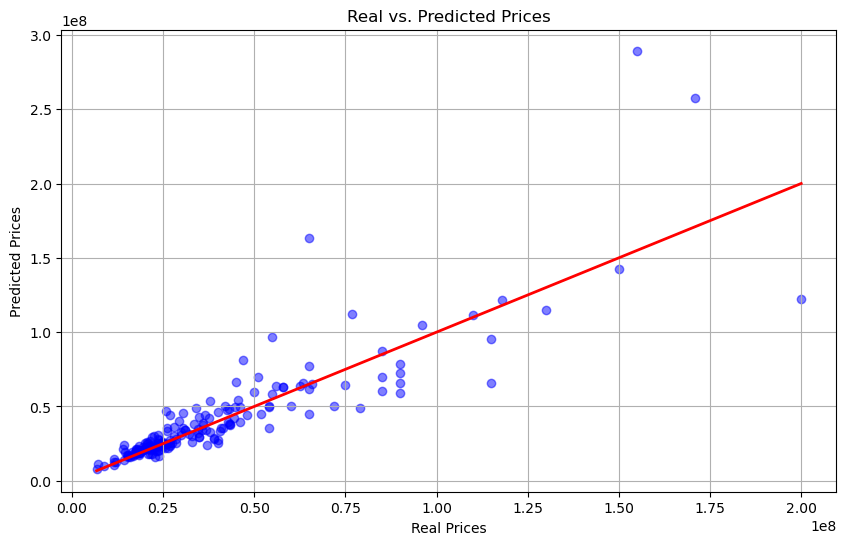

In [30]:
# Scatter Plot: Real vs. Predicted Prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color="blue")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linewidth=2)  # Perfect prediction line
plt.title("Real vs. Predicted Prices")
plt.xlabel("Real Prices")
plt.ylabel("Predicted Prices")
plt.grid()

In [31]:
summary_astana = pd.DataFrame({
    "Metric": ["Mean", "Median", "Standard Deviation"],
    "Real Prices": [np.mean(y_test), np.median(y_test), np.std(y_test)],
    "Predicted Prices": [np.mean(y_pred), np.median(y_pred), np.std(y_pred)],
})
summary_astana

,Metric,Real Prices,Predicted Prices
0,Mean,3.948895e+07,4.093291e+07
1,Median,2.825000e+07,2.926988e+07
2,Standard Deviation,3.036493e+07,3.547926e+07


In [32]:
comparison_df = pd.DataFrame({"Real Prices": y_test, "Predicted Prices": y_pred})
comparison_df

,Real Prices,Predicted Prices
868,96000000,1.050500e+08
439,24000000,2.725260e+07
342,18000000,1.953693e+07
735,18500000,2.078250e+07
784,27000000,2.533950e+07
...,...,...
598,14299999,2.386125e+07
867,19500000,2.097648e+07
445,25200000,2.465538e+07
785,21500000,2.712523e+07


In [33]:
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Calculate accuracy from MAPE
accuracy = 100 - mape
accuracy

82.02386449880362

### Astana 

In [73]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

df_astana = df[df['Город'] == 'Астана']
df_astana_encoded = pd.get_dummies(df_astana.drop(columns=['Краткая информация', 'Город']), drop_first=True)

Q1 = df_astana_encoded['Цена в тг'].quantile(0.25)
Q3 = df_astana_encoded['Цена в тг'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_filtered = df_astana_encoded[(df_astana_encoded['Цена в тг'] >= lower_bound) & (df_astana_encoded['Цена в тг'] <= upper_bound)]

# Features and Target   
X = df_filtered.drop(columns=['Цена в тг'])
y = df_filtered['Цена в тг']

# Log Transformation
y_log = np.log(y)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

rf = RandomForestRegressor(random_state=42, n_jobs=-1)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters from GridSearchCV
best_params = grid_search.best_params_

# Train the Random Forest Regressor with the best parameters
best_rf = RandomForestRegressor(**best_params, random_state=42, n_jobs=-1)
best_rf.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = best_rf.predict(X_test)

# Inverse log transformation to get the original price scale
y_pred_original = np.exp(y_pred)
y_test_original = np.exp(y_test)  # Inverse log transform y_test as well

mae = mean_absolute_error(y_test_original, y_pred_original)
mse = mean_squared_error(y_test_original, y_pred_original)
r2 = r2_score(y_test_original, y_pred_original)

# Step 3: Feature Importance Analysis
feature_importances = best_rf.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

# Step 4: Cross-Validation
cv_scores = cross_val_score(best_rf, X, y, cv=5, scoring='r2', n_jobs=-1)

# Results
print("MAE:", mae, "MSE:", mse, "R2:", r2)
best_params, mae, mse, r2, importance_df, cv_scores, np.mean(cv_scores)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
MAE: 5051752.479119733 MSE: 55537589461497.71 R2: 0.7756341370312373


({'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 50},
 5051752.479119733,
 55537589461497.71,
 0.7756341370312373,
                 Feature  Importance
 1            Площадь м2    0.747544
 4             Этаж_макс    0.069504
 0         Год Постройки    0.064152
 8   Район_Есильский р-н    0.037753
 3               Этаж_кв    0.031591
 9        Район_Нура р-н    0.012182
 2               Комната    0.011299
 5    Тип дома_кирпичный    0.007712
 11   Район_Сарыарка р-н    0.007372
 6   Тип дома_монолитный    0.006827
 10   Район_Сарайшык р-н    0.002069
 12   Район_р-н Байконур    0.001357
 7    Тип дома_панельный    0.000639,
 array([0.78078474, 0.75353942, 0.77950316, 0.75016127, 0.77214831]),
 0.7672273793184289)

In [43]:
df_astana_encoded

,Год Постройки,Площадь м2,Комната,Цена в тг,Этаж_кв,Этаж_макс,Тип дома_кирпичный,Тип дома_монолитный,Тип дома_панельный,Район_Есильский р-н,Район_Нура р-н,Район_Сарайшык р-н,Район_Сарыарка р-н,Район_р-н Байконур
0,2016,76.3,2,30000000,15,18,False,True,False,False,False,False,False,False
1,2022,35.8,1,16600000,4,9,True,False,False,False,False,False,False,False
2,2022,96.0,3,77800000,4,9,False,True,False,True,False,False,False,False
3,2019,130.0,3,155000000,4,7,False,True,False,False,False,False,False,False
4,2024,67.0,3,42500000,12,17,False,True,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,2022,60.0,3,42900000,6,11,True,False,False,False,True,False,False,False
903,2020,95.0,3,54500000,17,20,False,True,False,False,True,False,False,False
904,2016,36.0,1,20600000,2,16,False,True,False,False,False,False,False,True
905,2022,90.0,3,58000000,5,18,False,True,False,True,False,False,False,False


In [44]:
print(f"Mean Absolute Error (MAE): {mae:.2f}")


Mean Absolute Error (MAE): 5051752.48


In [46]:
print("Price Predictions for Astana:")
comparison_df = pd.DataFrame({"Real Prices": y_test, "Predicted Prices": y_pred})
comparison_df

Price Predictions for Astana:


,Real Prices,Predicted Prices
664,17.858562,17.723806
892,17.909855,17.659200
328,16.972511,17.114392
867,16.785925,16.822388
195,17.054189,16.986342
...,...,...
220,17.421008,17.210800
710,17.399029,17.803326
502,17.937794,17.872532
842,17.453097,17.459826


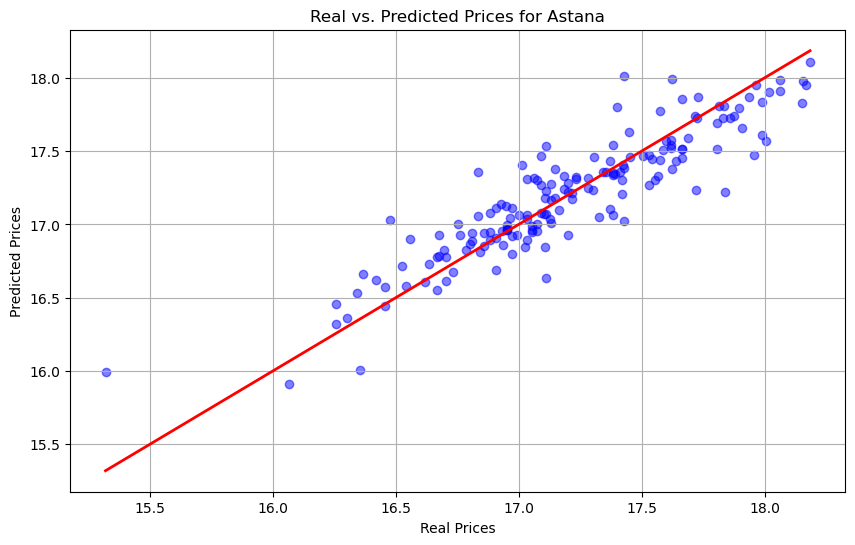

In [48]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color="blue")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linewidth=2)  # Perfect prediction line
plt.title("Real vs. Predicted Prices for Astana")
plt.xlabel("Real Prices")
plt.ylabel("Predicted Prices")
plt.grid()

### Almaty

In [49]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

df_almaty = df[df['Город'] == 'Алматы']
df_almaty_encoded = pd.get_dummies(df_almaty.drop(columns=['Краткая информация', 'Город']), drop_first=True)

Q1 = df_almaty_encoded['Цена в тг'].quantile(0.25)
Q3 = df_almaty_encoded['Цена в тг'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_filtered = df_almaty_encoded[(df_almaty_encoded['Цена в тг'] >= lower_bound) & (df_almaty_encoded['Цена в тг'] <= upper_bound)]

# Features and Target
X = df_filtered.drop(columns=['Цена в тг'])
y = df_filtered['Цена в тг']

# Log Transformation
y_log = np.log(y)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

rf = RandomForestRegressor(random_state=42, n_jobs=-1)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters from GridSearchCV
best_params = grid_search.best_params_

# Train the Random Forest Regressor with the best parameters
best_rf = RandomForestRegressor(**best_params, random_state=42, n_jobs=-1)
best_rf.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = best_rf.predict(X_test)

# Inverse log transformation to get the original price scale
y_pred_original = np.exp(y_pred)
y_test_original = np.exp(y_test) 

mae = mean_absolute_error(y_test_original, y_pred_original)
mse = mean_squared_error(y_test_original, y_pred_original)
r2 = r2_score(y_test_original, y_pred_original)

# Step 3: Feature Importance Analysis
feature_importances = best_rf.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

# Step 4: Cross-Validation
cv_scores = cross_val_score(best_rf, X, y, cv=5, scoring='r2', n_jobs=-1)

# Results
print("MAE:", mae, "MSE:", mse, "R2:", r2)
best_params, mae, mse, r2, importance_df, cv_scores, np.mean(cv_scores)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
MAE: 2531006.2389770537 MSE: 22371913148067.74 R2: 0.9159937300214712


({'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200},
 2531006.2389770537,
 22371913148067.74,
 0.9159937300214712,
                     Feature  Importance
 1                Площадь м2    0.697465
 10  Район_Бостандыкский р-н    0.050632
 4                 Этаж_макс    0.047514
 8     Район_Алмалинский р-н    0.039928
 0             Год Постройки    0.038775
 3                   Этаж_кв    0.036004
 12      Район_Медеуский р-н    0.034621
 13  Район_Наурызбайский р-н    0.015595
 9      Район_Ауэзовский р-н    0.013077
 2                   Комната    0.007510
 5        Тип дома_кирпичный    0.005651
 6       Тип дома_монолитный    0.005090
 14    Район_Турксибский р-н    0.004214
 7        Тип дома_панельный    0.001969
 11     Район_Жетысуский р-н    0.001955,
 array([0.9503346 , 0.99527139, 0.98055702, 0.71004975, 0.74108292]),
 0.8754591367653795)

In [50]:
df_almaty_encoded

,Год Постройки,Площадь м2,Комната,Цена в тг,Этаж_кв,Этаж_макс,Тип дома_кирпичный,Тип дома_монолитный,Тип дома_панельный,Район_Алмалинский р-н,Район_Ауэзовский р-н,Район_Бостандыкский р-н,Район_Жетысуский р-н,Район_Медеуский р-н,Район_Наурызбайский р-н,Район_Турксибский р-н
907,2022,200.0,4,120000000,1,5,False,True,False,False,False,True,False,False,False,False
908,2021,33.4,1,22500000,3,9,False,True,False,False,False,False,False,False,True,False
909,1959,72.0,3,56000000,3,3,True,False,False,True,False,False,False,False,False,False
910,1983,63.0,3,34000000,2,3,True,False,False,False,True,False,False,False,False,False
911,2013,85.2,3,55000000,10,10,False,True,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1687,2024,81.7,3,37000000,10,13,False,True,False,False,True,False,False,False,False,False
1688,2024,72.5,2,62400000,4,12,False,True,False,False,True,False,False,False,False,False
1689,2020,38.1,1,29500000,9,16,False,True,False,False,False,False,False,False,True,False
1690,2023,31.0,1,19800000,3,9,False,True,False,False,False,False,False,False,True,False


In [51]:
print(f"Mean Absolute Error (MAE) (Almaty): {mae:.2f}")

Mean Absolute Error (MAE) (Almaty): 2531006.24


In [53]:
print("Price Predictions for Almaty:")
comparison_df = pd.DataFrame({"Real Prices": y_test, "Predicted Prices": y_pred})
comparison_df

Price Predictions for Almaty:


,Real Prices,Predicted Prices
1620,17.182806,17.233830
943,17.795192,17.737307
1493,17.014184,17.155639
1129,17.529083,17.529383
1196,17.370859,17.368823
...,...,...
984,17.370859,17.392716
1264,17.929658,17.929658
1544,17.453097,17.470528
1191,17.399029,17.399029


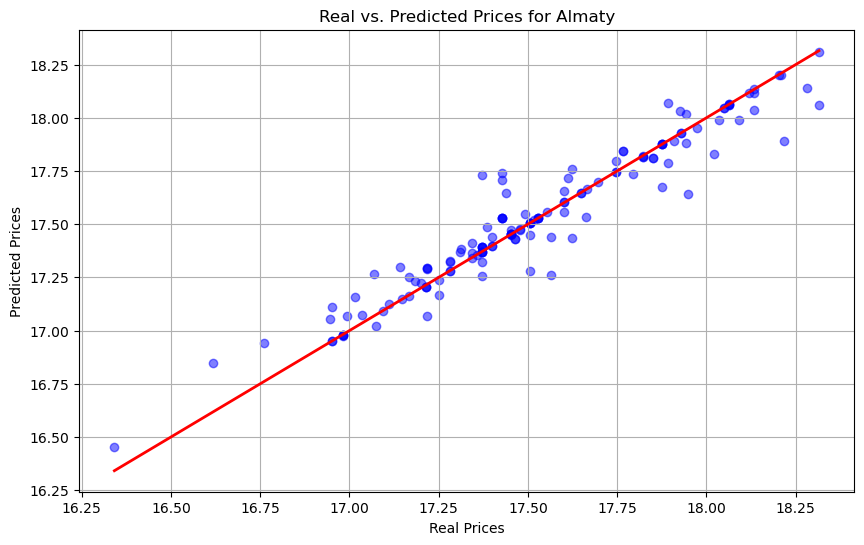

In [54]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color="blue")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linewidth=2)  # Perfect prediction line
plt.title("Real vs. Predicted Prices for Almaty")
plt.xlabel("Real Prices")
plt.ylabel("Predicted Prices")
plt.grid()

### Shymkent

In [74]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

df_shymkent= df[df['Город'] == 'Шымкент']
df_shymkent_encoded = pd.get_dummies(df_shymkent.drop(columns=['Краткая информация', 'Город']), drop_first=True)

# Step 3: Outlier Handling (Target Variable)
Q1 = df_shymkent_encoded['Цена в тг'].quantile(0.25)
Q3 = df_shymkent_encoded['Цена в тг'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_filtered = df_shymkent_encoded[(df_shymkent_encoded['Цена в тг'] >= lower_bound) & (df_shymkent_encoded['Цена в тг'] <= upper_bound)]

# Features and Target
X = df_filtered.drop(columns=['Цена в тг'])
y = df_filtered['Цена в тг']

# Log Transformation
y_log = np.log(y)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

rf = RandomForestRegressor(random_state=42, n_jobs=-1)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters from GridSearchCV
best_params = grid_search.best_params_

# Train the Random Forest Regressor with the best parameters
best_rf = RandomForestRegressor(**best_params, random_state=42, n_jobs=-1)
best_rf.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = best_rf.predict(X_test)

# Inverse log transformation to get the original price scale
y_pred_original = np.exp(y_pred)
y_test_original = np.exp(y_test)  # Inverse log transform y_test as well

mae = mean_absolute_error(y_test_original, y_pred_original)
mse = mean_squared_error(y_test_original, y_pred_original)
r2 = r2_score(y_test_original, y_pred_original)

# Step 3: Feature Importance Analysis
feature_importances = best_rf.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

# Step 4: Cross-Validation
cv_scores = cross_val_score(best_rf, X, y, cv=5, scoring='r2', n_jobs=-1)

# Results
print("MAE:", mae, "MSE:", mse, "R2:", r2)
best_params, mae, mse, r2, importance_df, cv_scores, np.mean(cv_scores)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
MAE: 3106012.003516654 MSE: 26034199130866.277 R2: 0.8143801108847268


({'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100},
 3106012.003516654,
 26034199130866.277,
 0.8143801108847268,
                       Feature  Importance
 1                  Площадь м2    0.769022
 0               Год Постройки    0.096584
 4                   Этаж_макс    0.045820
 3                     Этаж_кв    0.034731
 2                     Комната    0.013389
 7          Тип дома_панельный    0.012826
 5          Тип дома_кирпичный    0.005950
 8   Район_Аль-Фарабийский р-н    0.005608
 11            Район_Туран р-н    0.004834
 10      Район_Каратауский р-н    0.004387
 6         Тип дома_монолитный    0.003465
 9      Район_Енбекшинский р-н    0.003382,
 array([0.5323357 , 0.71742773, 0.80816809, 0.92018077, 0.68370828]),
 0.7323641119474262)

In [57]:
df_shymkent_encoded

,Год Постройки,Площадь м2,Комната,Цена в тг,Этаж_кв,Этаж_макс,Тип дома_кирпичный,Тип дома_монолитный,Тип дома_панельный,Район_Аль-Фарабийский р-н,Район_Енбекшинский р-н,Район_Каратауский р-н,Район_Туран р-н
1692,2023,98.0,3,41500000,8,8,False,True,False,True,False,False,False
1693,2022,49.0,1,28000000,6,16,False,True,False,False,False,False,False
1694,1963,52.2,2,23000000,2,3,True,False,False,False,True,False,False
1695,2022,124.1,3,70000000,5,5,True,False,False,False,False,True,False
1696,1987,82.0,4,40000000,9,9,False,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2283,2024,54.0,2,40000000,9,25,False,True,False,False,False,False,False
2284,1966,59.0,3,30000000,3,5,False,False,True,False,False,False,True
2285,1975,62.0,3,25500000,4,5,False,False,True,False,True,False,False
2286,1975,62.0,3,23000000,5,5,True,False,False,True,False,False,False


In [58]:
print(f"Mean Absolute Error (MAE) (Shymkent): {mae:.2f}")

Mean Absolute Error (MAE) (Shymkent): 3106012.00


In [60]:
print("Price Predictions for Shymkent:")
comparison_df = pd.DataFrame({"Real Prices": y_test, "Predicted Prices": y_pred})
comparison_df

Price Predictions for Shymkent:


,Real Prices,Predicted Prices
2177,17.092655,16.912563
2064,17.092655,17.177820
1889,16.993564,17.061438
1789,17.341871,17.365583
2054,17.216708,17.193316
...,...,...
1791,17.147715,17.143651
1954,16.364956,16.253187
2075,17.296751,17.192826
1729,16.839344,16.904368


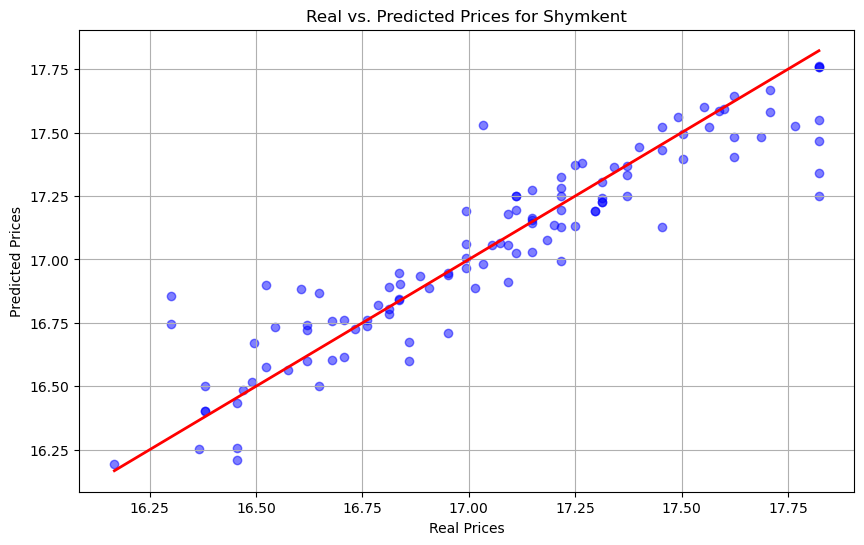

In [61]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color="blue")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linewidth=2)  # Perfect prediction line
plt.title("Real vs. Predicted Prices for Shymkent")
plt.xlabel("Real Prices")
plt.ylabel("Predicted Prices")
plt.grid()